基于AP聚类算法的量化选股策略研究

复刻《基于AP聚类算法的量化选股策略研究》，分为数据准备、因子筛选、聚类分析、机器学习预测、投资组合构建和结果评估六大阶段。

1. 数据准备
	1.	确定股票池：选择沪深300成分股作为研究对象，获取涵盖所有样本股票的基础数据。
	2.	因子收集：
	•	收集基本面因子，如市盈率（PE）、市净率（PB）、股息率等。
	•	收集技术面因子，如动量指标、波动率指标等。
	•	收集市场情绪因子，如换手率等。
	•	最终构建包含53个初始因子的因子库。
	3.	数据预处理：
	•	清洗数据：处理缺失值、异常值。
	•	标准化：对所有因子进行归一化处理，使其具有相同的量纲。
	•	时间序列转换：生成因子的多期滚动窗口值，构建因子的时间序列特征。

2. 因子筛选
	1.	因子有效性检验：
	•	相关性分析：计算因子之间的相关系数矩阵，剔除冗余因子。
	•	回归分析：利用多元线性回归分析因子对股票收益的解释能力。
	•	信息比率（IR）评估：通过因子的IR值筛选有效因子。
	2.	生成复合因子：
	•	综合有效因子，最大化信息比率（IR）。
	•	计算每个因子的权重，生成复合因子序列。

3. 聚类分析
	1.	动态时间规整（DTW）度量：
	•	利用DTW算法度量股票复合因子序列之间的相似性，解决时间序列对齐和延迟问题。
	•	构建相似性矩阵，作为后续聚类的输入。
	2.	AP聚类算法：
	•	使用AP（Affinity Propagation）聚类算法对股票进行分组。
	•	聚类参数调整：优化偏好参数和阻尼因子。
	•	聚类结果评估：计算轮廓系数和CH指标，选择最佳聚类数目。
	3.	类别分布分析：
	•	分析各类别股票的特征，确认聚类结果的合理性。

4. 机器学习预测
	1.	模型选择：
	•	使用支持向量机（SVM）、随机森林（Random Forest）、梯度提升树（XGBoost）三种机器学习算法。
	2.	因子与目标构建：
	•	利用本期的复合因子数据作为输入，预测下期股票收益率。
	•	定义目标变量：根据股票收益率上涨概率构建二分类目标（上涨/不涨）。
	3.	参数优化：
	•	使用网格搜索或贝叶斯优化寻找最佳超参数组合（如学习率、树深、核函数等）。
	4.	模型训练：
	•	在每个聚类类别中训练独立的模型。
	•	输出每只股票的预测上涨概率。

5. 投资组合构建
	1.	选股策略：
	•	对每个聚类类别中，选择预测上涨概率最高的股票。
	•	构建三个独立的投资组合，每个组合对应一种机器学习模型。
	2.	权重分配：
	•	利用Markowitz均值-方差模型分配权重，优化组合收益和风险。
	•	分别采用等权重和风险最小化两种加权方式，生成不同的投资组合。

6. 结果评估
	1.	投资组合评价指标：
	•	收益性：年度化收益率、超额收益率。
	•	风险性：波动率、最大回撤。
	•	综合性：夏普比率、信息比率。
	2.	结果对比：
	•	比较三种机器学习模型下的投资组合表现。
	•	分析不同加权方式的收益和风险差异。
	•	验证基于聚类选股策略的有效性。
	3.	实证结论：
	•	总结不同策略下的最佳配置。
	•	归纳基于AP聚类和机器学习选股策略的优势及适用性。

7. 报告撰写
	1.	结果展示：
	•	可视化每种策略下的收益曲线和风险评估指标。
	•	绘制聚类结果的分布图，展示股票类别特征。
	•	总结回测结果与市场基准的对比表现。
	2.	结论分析：
	•	结合实证研究的结果，分析该方法在风险控制和超额收益方面的优劣。
	•	提出策略改进建议和未来研究方向。

In [22]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/ruizhang/data_001/励京资本/df_AP001.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [ ]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,0.112613,-1.995346,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.113379,1.991067,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,0.116959,-3.685529,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.118624,3.295962,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.119190,4.562923,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,0.023469,-10.136988,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,NaN,NaN,61189.00,...,0.024480,-0.248179,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,NaN
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.023781,4.615453,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.024789,7.003006,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600


In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 加载数据
data = merged_data_001

# --- 1. 检查和删除全是 NaN 的列 ---
# 检查每列是否全是 NaN
data_cleaned = data.dropna(axis=1, how='all')

# --- 2. 分离数值型和非数值型列 ---
# 数值型特征
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# 非数值型特征
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

In [4]:
data_cleaned = data_cleaned.fillna(0)

In [ ]:
# --- 3. 填充部分 NaN 的数值型列 ---
for column in numeric_cols:
    if data_cleaned[column].isnull().sum() > 0:  # 如果有 NaN 值
        # 选择除当前列外的其他特征列作为特征
        X = data_cleaned.drop(columns=[column] + non_numeric_cols)  # 排除非数值型列
        y = data_cleaned[column]
        
        # 只保留非 NaN 的行来训练决策树
        X_train = X[~y.isnull()]
        y_train = y.dropna()

        # 如果有 NaN 的数据
        X_test = X[y.isnull()]
        
        # 训练决策树回归模型
        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train, y_train)

        # 填充 NaN 值
        data_cleaned.loc[y.isnull(), column] = model.predict(X_test)

# --- 4. 检查填充后的结果 ---
print("\n填充后的缺失情况：")
print(data_cleaned.isnull().sum())

# 输出填充后的数据头部
print(data_cleaned.head())

# --- 5. 继续后续的机器学习分析 ---
# 特征选择和目标变量构建
features = ['composite_factor', 'book_to_price_ratio', 'earnings_yield', 'sales_growth']
target_col = 'future_return'

# 构建目标变量：上涨/不涨
data_cleaned['target'] = (data_cleaned['future_return'] > 0).astype(int)

# 提取特征和目标变量
X = data_cleaned[features]
y = data_cleaned['target']

# 标准化特征
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 继续后续的机器学习训练...


填充后的缺失情况：
ts_code                0
trade_date             0
open                   0
high                   0
low                    0
close                  0
pre_close              0
change                 0
pct_chg                0
vol                    0
amount                 0
new_column             0
market_cap             0
size                   0
non_linear_size        0
book_value             0
book_to_price_ratio    0
liquidity              0
eps                    0
earnings_yield         0
sales_growth           0
growth                 0
total_debt             0
total_assets           0
leverage               0
future_return          0
composite_factor       0
dtype: int64
     ts_code  trade_date  open  high   low  close  pre_close        change  \
0  600000.SH    20240827  8.87  8.94  8.82   8.88       8.88  32654.212338   
1  600000.SH    20240828  8.92  8.93  8.76   8.82       8.88     -0.060000   
2  600000.SH    20240829  8.82  8.83  8.53   8.55       8.82     -0

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# --- 3. 模型选择与训练 ---

# 使用 Stratified KFold 对数据进行分层抽样，以保证类别分布均匀
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 定义模型
models = {
    'SVM': SVC(probability=True),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# --- 4. 参数优化 ---
# 网格搜索超参数优化
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'n_estimators': [100, 200],
        'subsample': [0.8, 1]
    }
}

# 定义结果字典
results = {}

# 遍历每个模型进行训练和优化
for model_name, model in models.items():
    print(f"正在训练 {model_name} 模型...")

    # 网格搜索
    grid_search = GridSearchCV(model, param_grids[model_name], cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y)

    # 输出最佳参数
    print(f"{model_name} 最佳参数: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # 在测试集上评估模型
    y_pred = best_model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, best_model.predict_proba(X_scaled)[:, 1])  # 预测概率的 AUC

    print(f"{model_name} 准确率: {accuracy:.4f}")
    print(f"{model_name} AUC: {auc:.4f}")
    
    # 保存结果
    results[model_name] = {
        'Best Model': best_model,
        'Accuracy': accuracy,
        'AUC': auc,
        'Classification Report': classification_report(y, y_pred)
    }

    print(f"{model_name} 训练完成。\n")

# 输出各模型的评估结果
for model_name, result in results.items():
    print(f"{model_name} 结果:")
    print(f"准确率: {result['Accuracy']:.4f}")
    print(f"AUC: {result['AUC']:.4f}")
    print(result['Classification Report'])
    print("="*50)

# --- 5. 训练结果预测：每只股票的预测上涨概率 ---

# 选定模型进行预测（例如选择 AUC 最高的模型）
best_model_name = max(results, key=lambda model: results[model]['AUC'])
best_model = results[best_model_name]['Best Model']

# 预测每只股票的上涨概率
predicted_probabilities = best_model.predict_proba(X_scaled)[:, 1]  # 获取上涨的概率

# 将预测结果添加到数据中
data['predicted_probability'] = predicted_probabilities

# 输出部分预测结果
print(f"\n{best_model_name} 的预测结果：")
print(data[['ts_code', 'trade_date', 'predicted_probability']].head())

正在训练 SVM 模型...


SVM 最佳参数: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM 准确率: 0.5783
SVM AUC: 0.4989
SVM 训练完成。

正在训练 RandomForest 模型...


/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ruizhang/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 最佳参数: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
RandomForest 准确率: 0.5793
RandomForest AUC: 0.5747
RandomForest 训练完成。

正在训练 XGBoost 模型...
XGBoost 最佳参数: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
XGBoost 准确率: 0.5788
XGBoost AUC: 0.5974
XGBoost 训练完成。

SVM 结果:
准确率: 0.5783
AUC: 0.4989
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19394
           1       0.58      1.00      0.73     26592

    accuracy                           0.58     45986
   macro avg       0.29      0.50      0.37     45986
weighted avg       0.33      0.58      0.42     45986

RandomForest 结果:
准确率: 0.5793
AUC: 0.5747
              precision    recall  f1-score   support

           0       0.86      0.00      0.01     19394
           1       0.58      1.00      0.73     26592

    accuracy                           0.58     45986
   macro avg       0.72      0.50      0.37     45986
weighted a

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

<Figure size 1000x600 with 0 Axes>

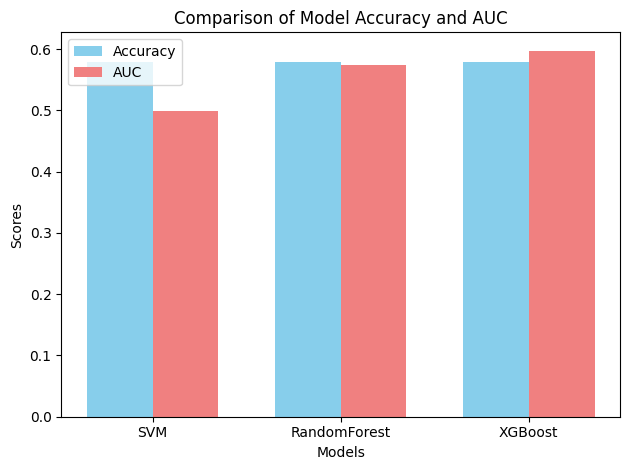

In [29]:
# 获取模型的准确率和 AUC
model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]
aucs = [results[model]['AUC'] for model in model_names]

# 设置图形尺寸
plt.figure(figsize=(10, 6))

# 绘制准确率和 AUC 的柱状图
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()

bar1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bar2 = ax.bar(x + width/2, aucs, width, label='AUC', color='lightcoral')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Accuracy and AUC')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# 显示图形
plt.tight_layout()
plt.show()

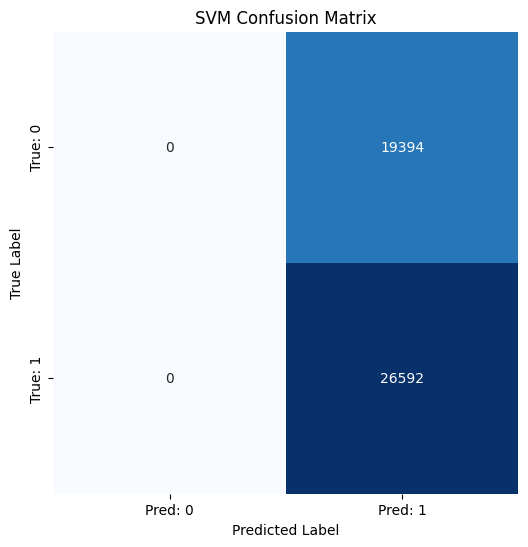

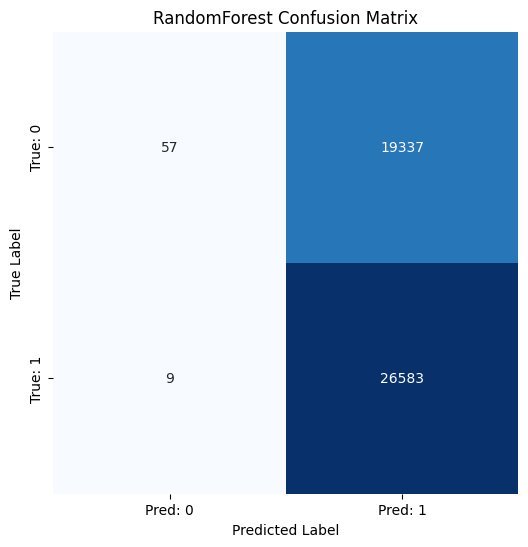

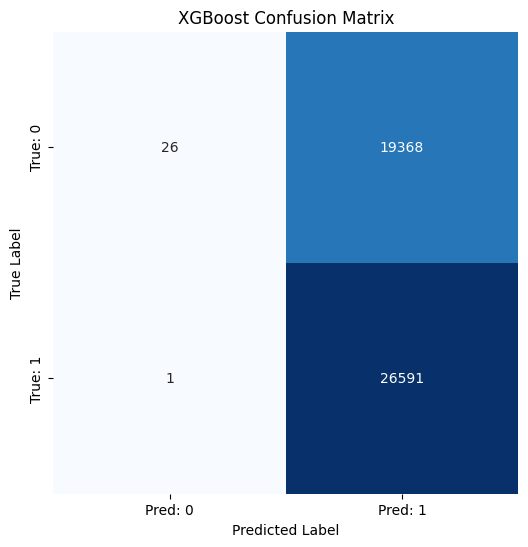

In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# 绘制每个模型的混淆矩阵
for model_name, result in results.items():
    y_pred = result['Best Model'].predict(X_scaled)
    plot_confusion_matrix(y, y_pred, model_name)

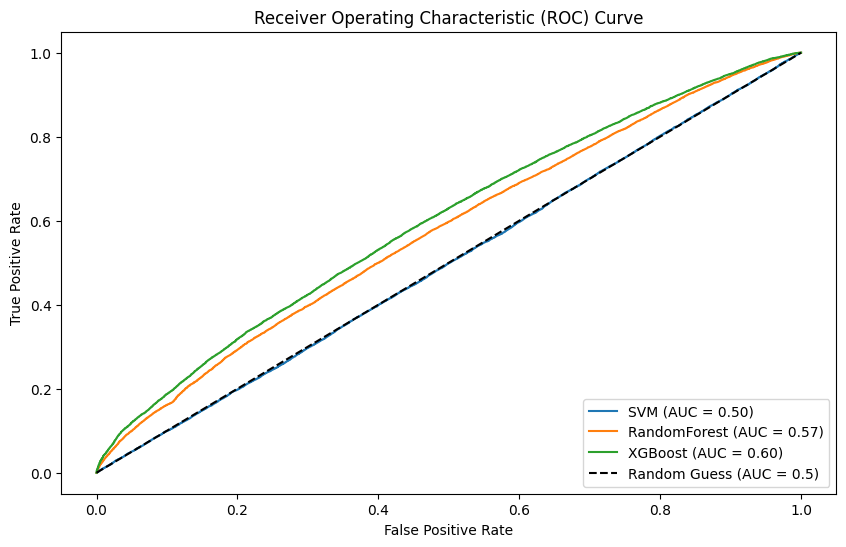

In [31]:
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# 绘制每个模型的 ROC 曲线
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    y_pred_prob = result['Best Model'].predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, auc_score, model_name)

# 绘制随机猜测的 ROC 曲线（即对角线）
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

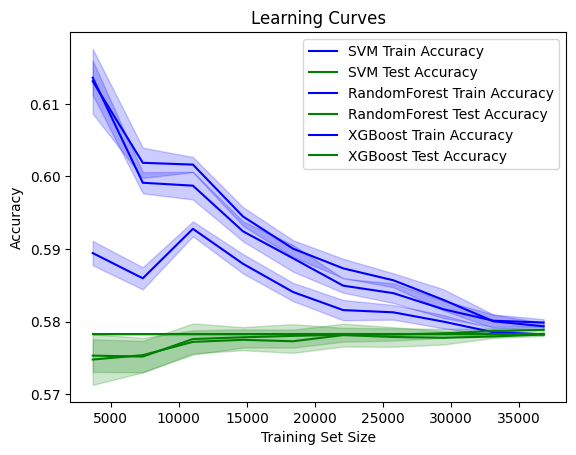

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=kf, n_jobs=-1, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # 计算训练和验证的平均值和标准差
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # 绘制学习曲线
    plt.plot(train_sizes, train_mean, label=f'{model_name} Train Accuracy', color='blue')
    plt.plot(train_sizes, test_mean, label=f'{model_name} Test Accuracy', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

# 绘制每个模型的学习曲线
for model_name, result in results.items():
    model = result['Best Model']
    plot_learning_curve(model, X_scaled, y, model_name)

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [34]:
# 选定模型进行预测（例如选择 AUC 最高的模型）
best_model_name = max(results, key=lambda model: results[model]['AUC'])
best_model = results[best_model_name]['Best Model']

# 预测每只股票的上涨概率
predicted_probabilities = best_model.predict_proba(X_scaled)[:, 1]  # 获取上涨的概率

# 将预测结果添加到数据中
data['predicted_probability'] = predicted_probabilities

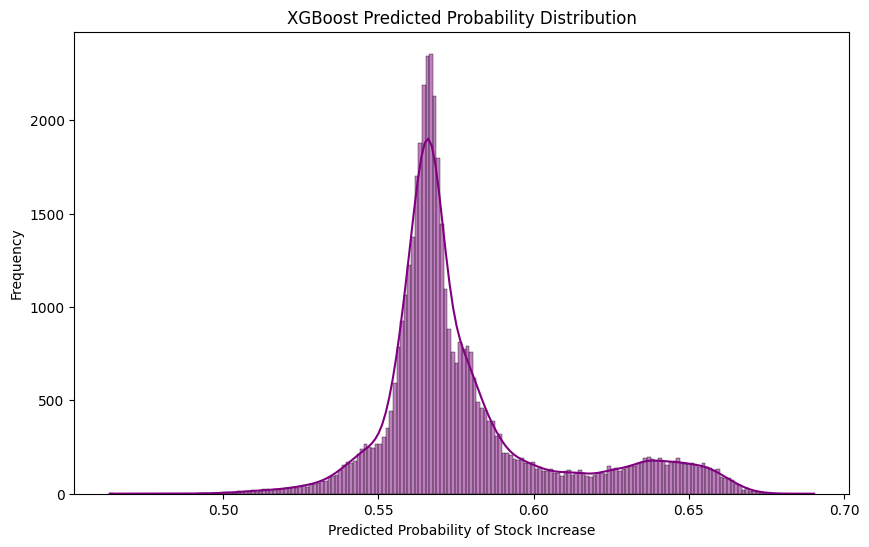

In [35]:
# 绘制预测概率的分布
plt.figure(figsize=(10, 6))
sns.histplot(data['predicted_probability'], kde=True, color='purple')
plt.title(f'{best_model_name} Predicted Probability Distribution')
plt.xlabel('Predicted Probability of Stock Increase')
plt.ylabel('Frequency')
plt.show()

In [23]:
data = merged_data_001

In [36]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability
0,600000.SH,20240827,8.87,8.94,8.82,8.88,8.88,32654.212338,32654.212338,306833.75,...,-0.224701,0.553952,0.553952,207.126924,2325.384915,0.089072,-0.6757,32654.212338,0,0.527242
1,600000.SH,20240828,8.92,8.93,8.76,8.82,8.88,-0.060000,-0.675700,325285.23,...,0.225745,-0.439003,-0.439003,734.917127,-824.768125,-0.891059,-3.0612,-0.675700,0,0.568384
2,600000.SH,20240829,8.82,8.83,8.53,8.55,8.82,-0.270000,-3.061200,509496.48,...,-0.431056,0.580298,0.580298,-266.707536,-1078.432896,0.247310,-1.4035,-3.061200,0,0.536802
3,600000.SH,20240830,8.54,8.62,8.38,8.43,8.55,-0.120000,-1.403500,683544.43,...,0.390980,-0.666449,-0.666449,211.874004,1004.072384,0.211015,-0.4745,-1.403500,0,0.567349
4,600000.SH,20240902,8.37,8.50,8.35,8.39,8.43,-0.040000,-0.474500,421785.96,...,0.543853,-0.607223,-0.607223,1440.916583,-2243.384536,-0.642296,-1.6687,-0.474500,0,0.568041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45981,689009.SH,20240919,43.11,43.87,42.14,42.61,43.04,-0.430000,-0.999100,106869.64,...,-0.237902,-0.291774,-0.291774,390.944512,138.678113,2.819079,-4.1305,-0.999100,2265,0.581852
45982,689009.SH,20240923,40.93,41.85,40.37,40.85,40.85,0.000000,0.000000,61189.00,...,-0.006075,2.027099,2.027099,-1912.956563,-4461.822947,0.428739,2.9376,0.000000,2265,0.567905
45983,689009.SH,20240924,41.72,42.18,40.08,42.05,40.85,1.200000,2.937600,93513.41,...,0.109761,1.465656,1.465656,-1433.734271,-235.504533,6.087926,-4.0666,2.937600,2265,0.607022
45984,689009.SH,20240925,42.40,42.45,40.20,40.34,42.05,-1.710000,-4.066600,114889.79,...,0.173600,-0.541579,-0.541579,2.600396,742.144903,0.003504,1.3386,-4.066600,2265,0.561680


In [26]:
data = data.fillna(0)

In [12]:
print(list(data.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'future_return', 'composite_factor']


In [37]:
# 假设数据中已经有了聚类标签 'cluster_label' 和预测上涨概率 'predicted_probability'

# 按照每个聚类类别，选择概率最高的股票
selected_stocks = []

# 逐个聚类类别进行处理
for cluster in data['cluster_label'].unique():
    cluster_data = data[data['cluster_label'] == cluster]
    top_stock = cluster_data.loc[cluster_data['predicted_probability'].idxmax()]  # 选出预测上涨概率最高的股票
    selected_stocks.append(top_stock)

# 将所有选中的股票组合成一个新的DataFrame
selected_stocks_df = pd.DataFrame(selected_stocks)

# 打印选中的股票
print(selected_stocks_df[['ts_code', 'trade_date', 'cluster_label', 'predicted_probability']])

         ts_code  trade_date  cluster_label  predicted_probability
20     600000.SH    20240926              0               0.659179
41     600004.SH    20240926              1               0.654884
48     600006.SH    20240904              2               0.616824
72     600007.SH    20240909              3               0.649606
99     600008.SH    20240919              4               0.655439
...          ...         ...            ...                    ...
45904  688799.SH    20240926           2261               0.651418
45907  688800.SH    20240829           2262               0.640140
45926  688819.SH    20240829           2263               0.630540
45965  688981.SH    20240926           2264               0.651844
45968  689009.SH    20240829           2265               0.644414

[2266 rows x 4 columns]


In [38]:
# 为选中的每只股票分配等权重
selected_stocks_df['weight_equal'] = 1 / len(selected_stocks_df)

# 打印等权重分配结果
print(selected_stocks_df[['ts_code', 'weight_equal']])

         ts_code  weight_equal
20     600000.SH      0.000441
41     600004.SH      0.000441
48     600006.SH      0.000441
72     600007.SH      0.000441
99     600008.SH      0.000441
...          ...           ...
45904  688799.SH      0.000441
45907  688800.SH      0.000441
45926  688819.SH      0.000441
45965  688981.SH      0.000441
45968  689009.SH      0.000441

[2266 rows x 2 columns]


In [40]:
selected_stocks_df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,sales_growth,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,1.086731,1.086731,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-0.590142,-0.590142,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-0.875561,-0.875561,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,0.885967,0.885967,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,-0.176784,-0.176784,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-0.383099,-0.383099,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,0.053467,0.053467,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,-0.815592,-0.815592,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1.008387,1.008387,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441


In [41]:
selected_stocks_df_001 = selected_stocks_df

In [49]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,growth,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,1.086731,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,NaN
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-0.590142,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,NaN
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-0.875561,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,NaN
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,0.885967,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,NaN
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,-0.176784,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-0.383099,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,NaN
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,0.053467,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,NaN
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,-0.815592,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,NaN
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1.008387,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,NaN


In [50]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 假设我们有选中股票的历史收盘价数据，存储在`price_data` DataFrame中，列为股票代码，行是日期
# 获取这些选中股票的收益率数据
selected_tickers = selected_stocks_df_001['ts_code'].tolist()
price_data = selected_stocks_df_001['close']  # 假设函数获取股票价格数据

# 计算股票的日收益率
selected_stocks_df_001['returns'] = price_data.pct_change().dropna()

# 计算日收益率的均值和协方差矩阵
selected_stocks_df_001['mean_returns'] = selected_stocks_df_001['returns'].mean()

In [45]:
returns = returns.fillna(0)

In [44]:
print(returns)

41       -0.036585
48       -0.377637
72        2.838983
99       -0.873731
125      10.842657
           ...    
45904    -0.086562
45907    -0.470189
45926     0.101098
45965     0.926049
45968     0.035807
Name: close, Length: 2265, dtype: float64


In [51]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns,mean_returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,NaN,1.155291
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,-0.036585,1.155291
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,-0.377637,1.155291
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,2.838983,1.155291
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,-0.873731,1.155291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,-0.086562,1.155291
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,-0.470189,1.155291
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,0.101098,1.155291
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,0.926049,1.155291


In [52]:
selected_stocks_df_001 = selected_stocks_df_001.fillna(0)

In [53]:
selected_stocks_df_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,total_debt,total_assets,leverage,future_return,composite_factor,cluster_label,predicted_probability,weight_equal,returns,mean_returns
20,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.350000,3.688100,898390.05,...,-71.829015,-110.471989,0.650201,0.3049,3.688100,0,0.659179,0.000441,0.000000,1.155291
41,600004.SH,20240926,9.09,9.48,9.03,9.48,9.09,0.390000,4.290400,247914.52,...,-175.363064,1973.725848,-0.088849,3.1646,4.290400,1,0.654884,0.000441,-0.036585,1.155291
48,600006.SH,20240904,5.82,6.01,5.81,5.90,5.90,9882.945977,9882.945977,269255.00,...,-144.080444,-1585.658160,0.090865,1.1864,9882.945977,2,0.616824,0.000441,-0.377637,1.155291
72,600007.SH,20240909,21.86,22.72,21.73,22.65,21.83,0.820000,3.756300,26005.51,...,-464.333573,-152.990680,3.035045,0.4415,3.756300,3,0.649606,0.000441,2.838983,1.155291
99,600008.SH,20240919,2.76,2.87,2.75,2.86,2.76,0.100000,3.623200,780095.97,...,932.840644,-57.558935,-16.206704,-2.0979,3.623200,4,0.655439,0.000441,-0.873731,1.155291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45904,688799.SH,20240926,39.75,41.40,39.55,41.26,40.10,1.160000,2.892800,6360.53,...,-1559.128986,2136.047377,-0.729913,6.1561,2.892800,2261,0.651418,0.000441,-0.086562,1.155291
45907,688800.SH,20240829,20.85,22.08,20.79,21.86,21.14,0.720000,3.405900,12856.02,...,-101.716083,608.330182,-0.167205,1.0979,3.405900,2262,0.640140,0.000441,-0.470189,1.155291
45926,688819.SH,20240829,22.80,24.24,22.76,24.07,22.10,1.970000,8.914000,64032.59,...,236.882252,692.684814,0.341977,2.4512,8.914000,2263,0.630540,0.000441,0.101098,1.155291
45965,688981.SH,20240926,45.00,46.49,44.77,46.36,44.90,1.460000,3.251700,260172.72,...,1323.439181,1243.512766,1.064275,7.8300,3.251700,2264,0.651844,0.000441,0.926049,1.155291


In [54]:
import pandas as pd

# 假设 selected_stocks_df_001 已经加载进来
# 确保数据按照股票代码（ts_code）和日期（trade_date）排序
# selected_stocks_df_001 = selected_stocks_df_001.sort_values(by=['ts_code', 'trade_date'])

# 计算每日收益率，使用收盘价（close）
# selected_stocks_df_001['returns'] = selected_stocks_df_001.groupby('ts_code')['close'].pct_change()

# 创建一个只包含收益率的 DataFrame
returns_df = selected_stocks_df_001.pivot_table(values='returns', index='trade_date', columns='ts_code')

# 输出收益率 DataFrame
print(returns_df.head())

ts_code     600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
trade_date                                                                     
20240827          NaN        NaN        NaN        NaN        NaN        NaN   
20240828          NaN        NaN        NaN        NaN        NaN        NaN   
20240829          NaN        NaN        NaN        NaN        NaN        NaN   
20240830          NaN        NaN        NaN        NaN        NaN        NaN   
20240902          NaN        NaN        NaN        NaN        NaN        NaN   

ts_code     600010.SH  600011.SH  600012.SH  600015.SH  ...  688787.SH  \
trade_date                                              ...              
20240827          NaN        NaN        NaN        NaN  ...        NaN   
20240828          NaN        NaN        NaN        NaN  ...        NaN   
20240829          NaN        NaN        NaN        NaN  ...        NaN   
20240830          NaN        NaN        NaN        NaN  ...        Na

In [55]:
# 计算收益率的协方差矩阵
cov_matrix = returns_df.cov()
print(cov_matrix)

ts_code    600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
ts_code                                                                       
600000.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600004.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600006.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600007.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600008.SH        NaN        NaN        NaN        NaN        NaN        NaN   
...              ...        ...        ...        ...        ...        ...   
688799.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688800.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688819.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688981.SH        NaN        NaN        NaN        NaN        NaN        NaN   
689009.SH        NaN        NaN        NaN        Na

In [57]:
mean_returns = selected_stocks_df_001['mean_returns']

In [58]:
# 风险最小化优化函数
def min_risk(weights, mean_returns, cov_matrix):
    # 投资组合的预期收益
    portfolio_return = np.sum(mean_returns * weights)
    # 投资组合的风险（标准差）
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility  # 最小化投资组合的风险

# 初始化等权重
init_weights = np.ones(len(mean_returns)) / len(mean_returns)

# 约束条件：权重之和为1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# 边界条件：每只股票的权重应在0和1之间
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# 使用最小化方法优化权重
opt_results = minimize(min_risk, init_weights, args=(mean_returns, cov_matrix), 
                       method='SLSQP', bounds=bounds, constraints=constraints)

# 获取优化后的权重
optimized_weights = opt_results.x

# 将优化后的权重添加到数据中
selected_stocks_df['weight_optimized'] = optimized_weights

# 打印优化后的权重
print(selected_stocks_df[['ts_code', 'weight_optimized']])

         ts_code  weight_optimized
20     600000.SH          0.000441
41     600004.SH          0.000441
48     600006.SH          0.000441
72     600007.SH          0.000441
99     600008.SH          0.000441
...          ...               ...
45904  688799.SH          0.000441
45907  688800.SH          0.000441
45926  688819.SH          0.000441
45965  688981.SH          0.000441
45968  689009.SH          0.000441

[2266 rows x 2 columns]


In [1]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/shanghai_stock_data_002.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [2]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,book_value,book_to_price_ratio,liquidity,eps,earnings_yield,sales_growth,growth,total_debt,total_assets,leverage
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,36.859667,0.000007,0.101317,0.504113,0.051075,-0.514387,-0.514387,-307.419622,-364.832706,0.842632
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,63.198520,0.000007,0.101626,-1.866847,-0.189720,1.086731,1.086731,-71.829015,-110.471989,0.650201
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,91.694942,0.000008,0.105374,-8.441166,-0.889480,0.164191,0.164191,-564.105146,4037.336523,-0.139722
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,109.858771,0.000014,0.110011,0.425035,0.046758,-0.332094,-0.332094,-1486.273907,-643.219087,2.310681
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,-133.236020,-0.000051,0.115875,4.139365,0.479648,-0.742193,-0.742193,322.417673,-4701.799805,-0.068573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,54.577840,0.000012,0.022153,1.159968,0.025697,-0.272862,-0.272862,-161.290433,-576.525839,0.279763
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,-123.271178,-0.000019,0.022371,14.173295,0.317076,-1.060399,-1.060399,-950.410104,2947.830919,-0.322410
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,120.721413,0.000047,0.020825,4.108913,0.085567,1.167121,1.167121,-1626.828640,1516.456522,-1.072783
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,17.474440,0.000011,0.021692,4.666269,0.101221,0.876054,0.876054,47.672116,4891.569473,0.009746


In [3]:
data_001 = merged_data_001

In [4]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/qlib_lightgbm_001.csv'  # 修改为正确的文件路径

try:
    merged_data_002 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [5]:
merged_data_002

,ALPHA11_60,ALPHA28_5_200,ALPHA28_5_20,ALPHA27_60_60,ALPHA27_20_20,ALPHA28_60_60,ALPHA44_5,ALPHA50_200,ALPHA50_5,ALPHA19_200_60,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,-1.084031,-74.050264,-8.076296,0.157367,0.339739,-16.797047,-0.16,-0.291977,-0.727424,-2135982.25,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,-0.918246,-95.780470,-6.785183,0.787863,0.270305,-39.618833,0.28,-0.868719,-0.256459,-10058412.25,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,-0.845632,-95.061508,-12.162844,0.393674,0.438253,-24.541273,-0.70,-0.733030,-0.958557,-10715802.25,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,-0.567320,-107.652026,-10.990493,0.054256,0.513836,-14.809698,0.49,-0.854425,-0.662701,-1363056.25,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,-0.183193,-102.780238,-7.460340,0.094240,0.029849,-9.207455,-0.60,-0.911389,-0.972506,-4126992.25,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535706,-0.157283,-89.841228,-10.720061,0.743640,0.903005,-38.750729,0.26,-0.622733,-0.438841,-9897316.00,...,7.303374e-07,0.665254,0.069078,0.569795,1.309360e-06,49.317056,0.000000,8.656834e-08,0.629970,-0.018724
1535707,-1.481784,-103.601675,-11.671295,0.427299,0.790301,-27.457336,-0.93,-0.515112,-0.983818,-18696976.00,...,5.343395e-07,0.920650,0.023449,0.387195,-3.496178e-07,56.350687,0.421778,-1.479807e-07,0.797489,-0.083301
1535708,-0.397772,-94.736087,-7.270236,0.474462,0.023614,-30.935528,-0.89,-0.500000,-0.895691,-986049.00,...,2.799989e-06,1.223422,0.056541,0.533029,-1.200094e-06,40.189392,1.027192,-3.710362e-06,1.099011,-0.080566
1535709,-1.071487,-78.491145,-11.523526,0.254795,0.276249,-19.664853,-0.54,-0.388380,-0.925380,-751689.00,...,1.051259e-05,0.838186,0.039926,0.387029,9.011868e-06,51.079676,0.289258,-2.554573e-06,0.680088,-0.015388


In [6]:
print(list(merged_data_002.columns))

['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'GTJA126', 'GTJA141_200_60', 'GTJA1_3_20', 'GTJA141_200_20', 'GTJA1_10_10', 'GTJA150', 'GTJA52_20', 'GTJA122_5', 'GTJA135_5', 'HmlRetStd_20

In [9]:
print(merged_data_001.columns)
print(list(merged_data_002.columns))

Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap',
       'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size',
       'book_value', 'book_to_price_ratio', 'liquidity', 'eps',
       'earnings_yield', 'sales_growth', 'growth', 'total_debt',
       'total_assets', 'leverage'],
      dtype='object')
['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA

In [11]:
# 目标列
columns_to_add = list(merged_data_002.columns)

# 检查是否缺列
missing_columns = [col for col in columns_to_add if col not in merged_data_001.columns]

# 合并数据
if missing_columns:
    print("缺失的列:", missing_columns)
    merged_data_001 = pd.concat([merged_data_001, merged_data_002[missing_columns]], axis=1)
else:
    print("所有列已存在于 merged_data_001 中")

# 检查合并结果
print("合并后的列:", merged_data_001.columns)

缺失的列: ['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'GTJA126', 'GTJA141_200_60', 'GTJA1_3_20', 'GTJA141_200_20', 'GTJA1_10_10', 'GTJA150', 'GTJA52_20', 'GTJA122_5', 'GTJA135_5', 'HmlRet

In [12]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.303374e-07,0.665254,0.069078,0.569795,1.309360e-06,49.317056,0.000000,8.656834e-08,0.629970,-0.018724
1535707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.343395e-07,0.920650,0.023449,0.387195,-3.496178e-07,56.350687,0.421778,-1.479807e-07,0.797489,-0.083301
1535708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.799989e-06,1.223422,0.056541,0.533029,-1.200094e-06,40.189392,1.027192,-3.710362e-06,1.099011,-0.080566
1535709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.051259e-05,0.838186,0.039926,0.387029,9.011868e-06,51.079676,0.289258,-2.554573e-06,0.680088,-0.015388


In [13]:
merged_data_001 = merged_data_001[:49717]

In [14]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,-2.658527e-07,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,1.319331e-05,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,3.900112e-06,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,2.612793e+00,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511


In [15]:
import os

# 定义桌面路径
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# 定义保存文件名
file_name = "shanghai_stock_data_003.csv"

# 拼接完整路径
file_path = os.path.join(desktop_path, file_name)

# 保存到桌面
merged_data_001.to_csv(file_path, index=False)

print(f"文件已保存到桌面：{file_path}")

文件已保存到桌面：/Users/a1/Desktop/shanghai_stock_data_003.csv


In [1]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/shanghai_stock_data_003.csv'  # 修改为正确的文件路径

try:
    merged_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [2]:
merged_data_001

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,-2.658527e-07,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,1.319331e-05,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,3.900112e-06,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,2.612793e+00,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511


In [3]:
print(list(merged_data_001.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_

In [9]:
import pandas as pd
import os

# 定义文件路径
input_file = "/Users/a1/Downloads/factors_157_test_2020-01-01_top2000.pkl"
output_file = "/Users/a1/Downloads/factors_157_test_2020-01-01_top2000.csv"

# 读取 pkl 文件
try:
    data = pd.read_pickle(input_file)
    print("文件成功读取！")

    # 保存为 CSV 文件
    data.to_csv(output_file, index=False)
    print(f"数据已成功保存为 CSV 文件：{output_file}")

except FileNotFoundError:
    print(f"文件未找到：{input_file}")
except Exception as e:
    print(f"读取或保存文件时出错：{e}")

文件成功读取！
数据已成功保存为 CSV 文件：/Users/a1/Downloads/factors_157_test_2020-01-01_top2000.csv


In [5]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/衍盛中国/Qlib/adj_price.csv'  # 修改为正确的文件路径

try:
    adj_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [6]:
adj_001

,open,high,low,close,volume,adj,adj_open,adj_high,adj_low,adj_close,dividend_amount,split_coefficient
0,2.781,2.875,2.781,2.875,300.0,0.896348,2.492745,2.577001,2.492745,2.577001,0.0,1.0
1,13.160,13.160,13.130,13.130,1071.0,0.048404,0.636991,0.636991,0.635539,0.635539,0.0,1.0
2,80.000,80.690,77.370,77.620,2487300.0,0.007539,0.603141,0.608343,0.583313,0.585198,0.0,1.0
3,27.880,29.630,27.880,28.750,288600.0,0.172412,4.806847,5.108568,4.806847,4.956845,0.0,1.0
4,13.000,13.000,12.880,13.000,1891.0,0.421454,5.478897,5.478897,5.428323,5.478897,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18604279,8.350,8.650,8.230,8.540,605687.0,1.000000,8.350000,8.650000,8.230000,8.540000,0.0,1.0
18604280,1.120,1.420,1.100,1.240,1211355.0,1.000000,1.120000,1.420000,1.100000,1.240000,0.0,1.0
18604281,37.510,37.680,36.960,37.150,1136941.0,1.000000,37.510000,37.680000,36.960000,37.150000,0.0,1.0
18604282,12.910,13.630,12.670,13.580,801366.0,1.000000,12.910000,13.630000,12.670000,13.580000,0.0,1.0


In [10]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Downloads/factors_157_test_2020-01-01_top2000.csv'  # 修改为正确的文件路径

try:
    f157_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [13]:
f157_001

,ALPHA11_60,ALPHA28_5_200,ALPHA28_5_20,ALPHA27_60_60,ALPHA27_20_20,ALPHA28_60_60,ALPHA44_5,ALPHA50_200,ALPHA50_5,ALPHA19_200_60,...,volatility_candle_up_std_60,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20
0,-1.084031,-74.050264,-8.076296,0.157367,0.339739,-16.797047,-0.16,-0.291977,-0.727424,-2135982.25,...,0.445160,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263
1,-0.918246,-95.780470,-6.785183,0.787863,0.270305,-39.618833,0.28,-0.868719,-0.256459,-10058412.25,...,0.440407,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691
2,-0.845632,-95.061508,-12.162844,0.393674,0.438253,-24.541273,-0.70,-0.733030,-0.958557,-10715802.25,...,0.490930,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743
3,-0.567320,-107.652026,-10.990493,0.054256,0.513836,-14.809698,0.49,-0.854425,-0.662701,-1363056.25,...,0.456662,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997
4,-0.183193,-102.780238,-7.460340,0.094240,0.029849,-9.207455,-0.60,-0.911389,-0.972506,-4126992.25,...,0.423437,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285128,-0.805736,-106.880043,-12.157998,0.795881,0.759218,-40.599316,-0.67,-0.781718,-0.744803,-19324816.00,...,0.719769,4.143228e-06,0.909204,0.137618,0.434605,-1.115452e-06,61.060964,1.473967,5.579194e-06,1.357824
2285129,-0.839397,-91.961224,-7.198393,0.271095,0.224097,-16.437023,0.18,-0.786680,-0.209005,-12503296.00,...,0.615873,1.195238e-05,1.047998,-0.007360,0.592120,-1.442913e-05,41.955036,0.431106,-3.134770e-05,0.596360
2285130,-0.798967,-95.358866,-13.304427,0.710953,0.214694,-30.871636,0.76,-0.455711,-0.989993,-2256004.00,...,0.466293,8.817663e-07,1.059004,0.000071,0.529429,-7.496330e-07,33.170447,1.881434,-2.254400e-06,0.435032
2285131,-0.875908,-103.204935,-8.308982,0.194369,0.091814,-21.156216,0.64,-0.323458,-0.706264,-1557504.00,...,0.541113,8.751776e-06,0.929933,-0.049296,0.375242,2.633423e-06,49.914710,0.708477,-1.392450e-05,0.591930


In [11]:
# 目标列
columns_to_add = list(f157_001.columns)

# 检查是否缺列
missing_columns = [col for col in columns_to_add if col not in adj_001.columns]

# 合并数据
if missing_columns:
    print("缺失的列:", missing_columns)
    adj_002 = pd.concat([adj_001, f157_001[missing_columns]], axis=1)
else:
    print("所有列已存在于 adj_001 中")

# 检查合并结果
print("合并后的列:", adj_002.columns)

缺失的列: ['ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'GTJA126', 'GTJA141_200_60', 'GTJA1_3_20', 'GTJA141_200_20', 'GTJA1_10_10', 'GTJA150', 'GTJA52_20', 'GTJA122_5', 'GTJA135_5', 'HmlRet

In [12]:
adj_002

,open,high,low,close,volume,adj,adj_open,adj_high,adj_low,adj_close,...,volatility_candle_up_std_60,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20
0,2.781,2.875,2.781,2.875,300.0,0.896348,2.492745,2.577001,2.492745,2.577001,...,0.445160,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263
1,13.160,13.160,13.130,13.130,1071.0,0.048404,0.636991,0.636991,0.635539,0.635539,...,0.440407,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691
2,80.000,80.690,77.370,77.620,2487300.0,0.007539,0.603141,0.608343,0.583313,0.585198,...,0.490930,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743
3,27.880,29.630,27.880,28.750,288600.0,0.172412,4.806847,5.108568,4.806847,4.956845,...,0.456662,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997
4,13.000,13.000,12.880,13.000,1891.0,0.421454,5.478897,5.478897,5.428323,5.478897,...,0.423437,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604279,8.350,8.650,8.230,8.540,605687.0,1.000000,8.350000,8.650000,8.230000,8.540000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18604280,1.120,1.420,1.100,1.240,1211355.0,1.000000,1.120000,1.420000,1.100000,1.240000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18604281,37.510,37.680,36.960,37.150,1136941.0,1.000000,37.510000,37.680000,36.960000,37.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18604282,12.910,13.630,12.670,13.580,801366.0,1.000000,12.910000,13.630000,12.670000,13.580000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
adj_002 = adj_002[:2285133]

In [15]:
adj_002

,open,high,low,close,volume,adj,adj_open,adj_high,adj_low,adj_close,...,volatility_candle_up_std_60,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20
0,2.781,2.875,2.781,2.875,300.0,8.963483e-01,2.492745e+00,2.577001e+00,2.492745e+00,2.577001e+00,...,0.445160,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263
1,13.160,13.160,13.130,13.130,1071.0,4.840358e-02,6.369911e-01,6.369911e-01,6.355390e-01,6.355390e-01,...,0.440407,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691
2,80.000,80.690,77.370,77.620,2487300.0,7.539267e-03,6.031414e-01,6.083435e-01,5.833131e-01,5.851979e-01,...,0.490930,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743
3,27.880,29.630,27.880,28.750,288600.0,1.724120e-01,4.806847e+00,5.108568e+00,4.806847e+00,4.956845e+00,...,0.456662,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997
4,13.000,13.000,12.880,13.000,1891.0,4.214536e-01,5.478897e+00,5.478897e+00,5.428323e+00,5.478897e+00,...,0.423437,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285128,30.680,30.880,30.560,30.880,1073200.0,9.512000e-01,2.918282e+01,2.937306e+01,2.906867e+01,2.937306e+01,...,0.719769,4.143228e-06,0.909204,0.137618,0.434605,-1.115452e-06,61.060964,1.473967,5.579194e-06,1.357824
2285129,53.000,53.450,53.000,53.450,1653.0,4.017942e-01,2.129509e+01,2.147590e+01,2.129509e+01,2.147590e+01,...,0.615873,1.195238e-05,1.047998,-0.007360,0.592120,-1.442913e-05,41.955036,0.431106,-3.134770e-05,0.596360
2285130,40.480,41.180,40.390,40.480,22500.0,3.688908e-01,1.493270e+01,1.519092e+01,1.489950e+01,1.493270e+01,...,0.466293,8.817663e-07,1.059004,0.000071,0.529429,-7.496330e-07,33.170447,1.881434,-2.254400e-06,0.435032
2285131,65.790,67.340,65.760,66.410,1243800.0,4.574230e-01,3.009386e+01,3.080287e+01,3.008014e+01,3.037746e+01,...,0.541113,8.751776e-06,0.929933,-0.049296,0.375242,2.633423e-06,49.914710,0.708477,-1.392450e-05,0.591930


In [16]:
import os
# 定义桌面路径
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
# 定义保存文件名
file_name = "adj_002.csv"
# 拼接完整路径
file_path = os.path.join(desktop_path, file_name)
# 保存到桌面
adj_002.to_csv(file_path, index=False)
print(f"文件已保存到桌面：{file_path}")

文件已保存到桌面：/Users/a1/Desktop/adj_002.csv


In [17]:
adj_002

,open,high,low,close,volume,adj,adj_open,adj_high,adj_low,adj_close,...,volatility_candle_up_std_60,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20
0,2.781,2.875,2.781,2.875,300.0,8.963483e-01,2.492745e+00,2.577001e+00,2.492745e+00,2.577001e+00,...,0.445160,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263
1,13.160,13.160,13.130,13.130,1071.0,4.840358e-02,6.369911e-01,6.369911e-01,6.355390e-01,6.355390e-01,...,0.440407,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691
2,80.000,80.690,77.370,77.620,2487300.0,7.539267e-03,6.031414e-01,6.083435e-01,5.833131e-01,5.851979e-01,...,0.490930,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743
3,27.880,29.630,27.880,28.750,288600.0,1.724120e-01,4.806847e+00,5.108568e+00,4.806847e+00,4.956845e+00,...,0.456662,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997
4,13.000,13.000,12.880,13.000,1891.0,4.214536e-01,5.478897e+00,5.478897e+00,5.428323e+00,5.478897e+00,...,0.423437,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285128,30.680,30.880,30.560,30.880,1073200.0,9.512000e-01,2.918282e+01,2.937306e+01,2.906867e+01,2.937306e+01,...,0.719769,4.143228e-06,0.909204,0.137618,0.434605,-1.115452e-06,61.060964,1.473967,5.579194e-06,1.357824
2285129,53.000,53.450,53.000,53.450,1653.0,4.017942e-01,2.129509e+01,2.147590e+01,2.129509e+01,2.147590e+01,...,0.615873,1.195238e-05,1.047998,-0.007360,0.592120,-1.442913e-05,41.955036,0.431106,-3.134770e-05,0.596360
2285130,40.480,41.180,40.390,40.480,22500.0,3.688908e-01,1.493270e+01,1.519092e+01,1.489950e+01,1.493270e+01,...,0.466293,8.817663e-07,1.059004,0.000071,0.529429,-7.496330e-07,33.170447,1.881434,-2.254400e-06,0.435032
2285131,65.790,67.340,65.760,66.410,1243800.0,4.574230e-01,3.009386e+01,3.080287e+01,3.008014e+01,3.037746e+01,...,0.541113,8.751776e-06,0.929933,-0.049296,0.375242,2.633423e-06,49.914710,0.708477,-1.392450e-05,0.591930


In [19]:
print(list(adj_002.columns))

['open', 'high', 'low', 'close', 'volume', 'adj', 'adj_open', 'adj_high', 'adj_low', 'adj_close', 'dividend_amount', 'split_coefficient', 'ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_60', 'GTJA9_20', 'GTJA52_5', 'GTJA135_20', 'GTJA141_60_20', 'GTJA84_20', 'GTJA65_60', 'GTJA114_200_200', 'GTJA141_20_10', 'GTJA141_60_200', 'GTJA144_200', 'GTJA1_5_60', 'GTJA1_5_10', 'GTJA29_60', 'GTJA134_60', 'G

In [20]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/a1/Desktop/shanghai_stock_data_003.csv'  # 修改为正确的文件路径

try:
    merged_data_003 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [21]:
merged_data_003

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,-2.658527e-07,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,1.319331e-05,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,3.900112e-06,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,2.612793e+00,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511


In [22]:
print(list(merged_data_003.columns))

['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount', 'new_column', 'market_cap', 'size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size', 'book_value', 'book_to_price_ratio', 'liquidity', 'eps', 'earnings_yield', 'sales_growth', 'growth', 'total_debt', 'total_assets', 'leverage', 'ALPHA11_60', 'ALPHA28_5_200', 'ALPHA28_5_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA28_60_60', 'ALPHA44_5', 'ALPHA50_200', 'ALPHA50_5', 'ALPHA19_200_60', 'ALPHA25_20', 'ALPHA8_200_200', 'ALPHA27_200_200', 'ALPHA19_60_60', 'ALPHA19_20_20', 'ALPHA6_5', 'ALPHA8_20_60', 'ALPHA19_5_20', 'ALPHA3_5', 'ALPHA22_200_5', 'ALPHA47_20_5', 'ALPHA22_60_5', 'ALPHA22_20_5', 'GTJA53_200', 'GTJA122_200', 'GTJA135_200', 'GTJA9_200', 'GTJA122_60', 'GTJA52_200', 'GTJA42_200', 'GTJA83_60', 'GTJA83_5', 'GTJA136_3_20', 'GTJA3_5', 'GTJA3_200', 'GTJA29_5', 'GTJA134_5', 'GTJA136_3_10', 'GTJA84_5', 'GTJA84_200', 'GTJA122_20', 'GTJA141_10_20', 'GTJA14_60', 'GTJA141_60_

In [24]:
merged_data_003.fillna(0)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_60_250,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.482984e-05,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-1.143647e-06,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-1.623786e-07,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,-5.569888e-06,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,2.405466e-05,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,-2.658527e-07,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,1.319331e-05,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,3.900112e-06,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,2.612793e+00,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 读取数据
df = merged_data_003.copy()

# 定义因子列表（剔除非因子列，如'ts_code', 'trade_date'等）
factor_columns = df.columns.difference(['ts_code', 'trade_date', 'forward_return', 'close'])

# 1. 相关性分析：剔除高相关性因子
def drop_highly_correlated_factors(data, threshold=0.8):
    corr_matrix = data.corr()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]
    return data.drop(columns=to_drop), to_drop

# 标准化因子数据
scaler = StandardScaler()
factor_data = pd.DataFrame(scaler.fit_transform(df[factor_columns]), columns=factor_columns)

# 剔除高相关性因子
filtered_data, dropped_factors = drop_highly_correlated_factors(factor_data)
print(f"Dropped due to high correlation: {dropped_factors}")

/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Dropped due to high correlation: ['ALPHA28_60_60', 'ALPHA50_200', 'CCI_20', 'GTJA29_5', 'GTJA29_60', 'GTJA9_200', 'HUATAI3_200', 'KAMA_5', 'MFI_20', 'MOM_5', 'RSI_200', 'low', 'm1_sharpe_min_250', 'market_cap', 'open', 'pct_chg', 'pre_close', 'sales_growth', 'size', 'volatility_hpl_ret_std_20', 'volatility_huatai_1_10_120', 'volatility_rvi_20_1', 'volm_obv_ratio_250', 'volm_vwap_div_ma_diff_20_250', 'volm_vwap_div_ma_diff_60_250']


In [26]:
filtered_data

,ADX_20,ADX_200,ADX_5,AD_20_10,ALPHA11_60,ALPHA19_200_60,ALPHA19_20_20,ALPHA19_5_20,ALPHA19_60_60,ALPHA22_200_5,...,trend_gtja8_120,trend_lr_120_60,vol,volatility_candle_dn_std_20,volatility_candle_up_std_10,volatility_candle_up_std_60,volatility_rvi_120_5,volm_adv_ratio_10_250,volm_pv_fit_20,volm_vwap_div_ma_diff_5_60
0,0.288412,-1.181755,0.637425,0.599856,-0.794965,0.346615,0.848397,-0.058602,0.707479,0.165381,...,-0.067258,0.307989,1.137738,-0.907894,-0.839555,-0.576997,1.057515,-0.878224,-0.432762,-0.008987
1,-0.828884,1.077966,0.065540,-1.204253,-0.480818,-1.590915,0.809250,-1.123429,0.755269,0.227132,...,1.044817,0.138108,2.005311,-0.801649,-1.446858,-0.595793,-1.007993,-0.199598,-0.836289,-0.009037
2,-1.417274,0.958697,-0.787483,-1.236441,-0.343221,-1.751689,0.881693,-0.804422,0.730530,0.227132,...,0.555083,0.034095,2.778322,-0.521792,0.034708,-0.395997,-1.646547,-0.171857,0.034269,-0.009039
3,-1.483947,-0.220468,-1.861471,-0.105582,0.184153,0.535644,0.933957,0.331906,0.775239,0.204896,...,0.633265,0.243172,1.988621,0.820269,-0.686063,-0.531512,0.067261,0.438060,0.038950,-0.008974
4,-1.422956,-0.187452,-1.285650,-0.402995,0.912037,-0.140312,0.938279,-0.304598,0.582280,0.227132,...,-0.037113,-0.242721,0.423155,-0.437143,-1.291430,-0.662902,-0.314727,-0.798594,-0.624440,-0.008927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,-0.243741,-0.254521,-0.587967,0.368965,1.138258,0.478878,-0.292653,-1.001126,0.763992,0.216527,...,0.461203,0.230640,-0.093272,-0.416217,-0.673023,0.693466,-0.029579,-0.130529,0.001473,-0.009036
49713,-0.560017,-1.139050,-0.724861,0.066372,0.846591,0.223993,-0.367026,0.456797,0.656954,-0.409462,...,-0.982739,0.271352,0.006976,-0.778781,1.532903,0.297770,-0.422845,-0.388042,-0.410223,-0.009001
49714,1.621148,1.708286,-0.571293,0.825624,0.164668,-0.629103,-2.356293,-0.845150,0.077197,0.203466,...,1.476809,0.340749,-0.230746,-0.273234,-0.218691,-0.102720,1.058080,-0.354149,0.173180,-0.009038
49715,0.429044,-1.372945,2.265340,-0.084796,-0.698369,0.263098,0.819191,0.370086,-1.275031,-0.386350,...,-0.433661,-21.936848,-0.277563,0.515340,-1.368351,-0.453623,-0.095617,-0.738797,-0.161910,6.688347


In [27]:
print(list(filtered_data.columns))

['ADX_20', 'ADX_200', 'ADX_5', 'AD_20_10', 'ALPHA11_60', 'ALPHA19_200_60', 'ALPHA19_20_20', 'ALPHA19_5_20', 'ALPHA19_60_60', 'ALPHA22_200_5', 'ALPHA22_20_5', 'ALPHA22_60_5', 'ALPHA25_20', 'ALPHA27_200_200', 'ALPHA27_20_20', 'ALPHA27_60_60', 'ALPHA28_5_20', 'ALPHA28_5_200', 'ALPHA3_5', 'ALPHA44_5', 'ALPHA47_20_5', 'ALPHA50_5', 'ALPHA6_5', 'ALPHA8_200_200', 'ALPHA8_20_60', 'AR_20', 'AR_200', 'AR_5', 'AR_60', 'Aroon_20', 'Aroon_200', 'Aroon_60', 'BIAS_5', 'BR_5', 'BR_60', 'BollingerPosition_200_2', 'BollingerPosition_20_1', 'BollingerPosition_5_1', 'BollingerPosition_60_2', 'CCI_200', 'CCI_5', 'CO_20', 'CO_200', 'CR_5', 'DBCD_20', 'DBCD_200', 'DBCD_5', 'DBCD_60', 'GTJA114_200_200', 'GTJA122_20', 'GTJA122_200', 'GTJA122_5', 'GTJA122_60', 'GTJA126', 'GTJA134_5', 'GTJA134_60', 'GTJA135_20', 'GTJA135_200', 'GTJA135_5', 'GTJA136_3_10', 'GTJA136_3_20', 'GTJA141_10_20', 'GTJA141_200_20', 'GTJA141_200_60', 'GTJA141_20_10', 'GTJA141_60_20', 'GTJA141_60_200', 'GTJA141_60_60', 'GTJA144_200', 'GTJA14

In [33]:
filtered_data.fillna(0)

,ADX_20,ADX_200,ADX_5,AD_20_10,ALPHA11_60,ALPHA19_200_60,ALPHA19_20_20,ALPHA19_5_20,ALPHA19_60_60,ALPHA22_200_5,...,trend_gtja8_120,trend_lr_120_60,vol,volatility_candle_dn_std_20,volatility_candle_up_std_10,volatility_candle_up_std_60,volatility_rvi_120_5,volm_adv_ratio_10_250,volm_pv_fit_20,volm_vwap_div_ma_diff_5_60
0,0.288412,-1.181755,0.637425,0.599856,-0.794965,0.346615,0.848397,-0.058602,0.707479,0.165381,...,-0.067258,0.307989,1.137738,-0.907894,-0.839555,-0.576997,1.057515,-0.878224,-0.432762,-0.008987
1,-0.828884,1.077966,0.065540,-1.204253,-0.480818,-1.590915,0.809250,-1.123429,0.755269,0.227132,...,1.044817,0.138108,2.005311,-0.801649,-1.446858,-0.595793,-1.007993,-0.199598,-0.836289,-0.009037
2,-1.417274,0.958697,-0.787483,-1.236441,-0.343221,-1.751689,0.881693,-0.804422,0.730530,0.227132,...,0.555083,0.034095,2.778322,-0.521792,0.034708,-0.395997,-1.646547,-0.171857,0.034269,-0.009039
3,-1.483947,-0.220468,-1.861471,-0.105582,0.184153,0.535644,0.933957,0.331906,0.775239,0.204896,...,0.633265,0.243172,1.988621,0.820269,-0.686063,-0.531512,0.067261,0.438060,0.038950,-0.008974
4,-1.422956,-0.187452,-1.285650,-0.402995,0.912037,-0.140312,0.938279,-0.304598,0.582280,0.227132,...,-0.037113,-0.242721,0.423155,-0.437143,-1.291430,-0.662902,-0.314727,-0.798594,-0.624440,-0.008927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,-0.243741,-0.254521,-0.587967,0.368965,1.138258,0.478878,-0.292653,-1.001126,0.763992,0.216527,...,0.461203,0.230640,-0.093272,-0.416217,-0.673023,0.693466,-0.029579,-0.130529,0.001473,-0.009036
49713,-0.560017,-1.139050,-0.724861,0.066372,0.846591,0.223993,-0.367026,0.456797,0.656954,-0.409462,...,-0.982739,0.271352,0.006976,-0.778781,1.532903,0.297770,-0.422845,-0.388042,-0.410223,-0.009001
49714,1.621148,1.708286,-0.571293,0.825624,0.164668,-0.629103,-2.356293,-0.845150,0.077197,0.203466,...,1.476809,0.340749,-0.230746,-0.273234,-0.218691,-0.102720,1.058080,-0.354149,0.173180,-0.009038
49715,0.429044,-1.372945,2.265340,-0.084796,-0.698369,0.263098,0.819191,0.370086,-1.275031,-0.386350,...,-0.433661,-21.936848,-0.277563,0.515340,-1.368351,-0.453623,-0.095617,-0.738797,-0.161910,6.688347


In [34]:
# 检查缺失值
missing_summary = factor_data.isna().sum()
print(f"Missing values before handling:\n{missing_summary[missing_summary > 0]}")

# 处理缺失值（所有列使用均值填充，确保无NaN）
factor_data = factor_data.fillna(factor_data.mean())

# 再次检查是否还有缺失值
missing_after = factor_data.isna().sum().sum()
if missing_after > 0:
    print(f"Still contains {missing_after} missing values!")
else:
    print("Missing values handled successfully. No NaN values remain.")

# 多元线性回归
X = factor_data
y = df['forward_return']

# 确保目标变量y没有缺失值
if y.isna().sum() > 0:
    print("Handling missing values in target variable (forward_return).")
    y = y.fillna(y.mean())

Missing values before handling:
CO_200                 49717
TEMA_200               49717
beta                   49717
momentum               49717
residual_volatility    49717
dtype: int64
Still contains 248585 missing values!


In [36]:
print(filtered_data['CO_200'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49712   NaN
49713   NaN
49714   NaN
49715   NaN
49716   NaN
Name: CO_200, Length: 49717, dtype: float64


In [37]:
filtered_data = filtered_data.drop(columns=['CO_200', 'TEMA_200','beta', 'momentum','residual_volatility'])

In [38]:
filtered_data

,ADX_20,ADX_200,ADX_5,AD_20_10,ALPHA11_60,ALPHA19_200_60,ALPHA19_20_20,ALPHA19_5_20,ALPHA19_60_60,ALPHA22_200_5,...,trend_gtja8_120,trend_lr_120_60,vol,volatility_candle_dn_std_20,volatility_candle_up_std_10,volatility_candle_up_std_60,volatility_rvi_120_5,volm_adv_ratio_10_250,volm_pv_fit_20,volm_vwap_div_ma_diff_5_60
0,0.288412,-1.181755,0.637425,0.599856,-0.794965,0.346615,0.848397,-0.058602,0.707479,0.165381,...,-0.067258,0.307989,1.137738,-0.907894,-0.839555,-0.576997,1.057515,-0.878224,-0.432762,-0.008987
1,-0.828884,1.077966,0.065540,-1.204253,-0.480818,-1.590915,0.809250,-1.123429,0.755269,0.227132,...,1.044817,0.138108,2.005311,-0.801649,-1.446858,-0.595793,-1.007993,-0.199598,-0.836289,-0.009037
2,-1.417274,0.958697,-0.787483,-1.236441,-0.343221,-1.751689,0.881693,-0.804422,0.730530,0.227132,...,0.555083,0.034095,2.778322,-0.521792,0.034708,-0.395997,-1.646547,-0.171857,0.034269,-0.009039
3,-1.483947,-0.220468,-1.861471,-0.105582,0.184153,0.535644,0.933957,0.331906,0.775239,0.204896,...,0.633265,0.243172,1.988621,0.820269,-0.686063,-0.531512,0.067261,0.438060,0.038950,-0.008974
4,-1.422956,-0.187452,-1.285650,-0.402995,0.912037,-0.140312,0.938279,-0.304598,0.582280,0.227132,...,-0.037113,-0.242721,0.423155,-0.437143,-1.291430,-0.662902,-0.314727,-0.798594,-0.624440,-0.008927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,-0.243741,-0.254521,-0.587967,0.368965,1.138258,0.478878,-0.292653,-1.001126,0.763992,0.216527,...,0.461203,0.230640,-0.093272,-0.416217,-0.673023,0.693466,-0.029579,-0.130529,0.001473,-0.009036
49713,-0.560017,-1.139050,-0.724861,0.066372,0.846591,0.223993,-0.367026,0.456797,0.656954,-0.409462,...,-0.982739,0.271352,0.006976,-0.778781,1.532903,0.297770,-0.422845,-0.388042,-0.410223,-0.009001
49714,1.621148,1.708286,-0.571293,0.825624,0.164668,-0.629103,-2.356293,-0.845150,0.077197,0.203466,...,1.476809,0.340749,-0.230746,-0.273234,-0.218691,-0.102720,1.058080,-0.354149,0.173180,-0.009038
49715,0.429044,-1.372945,2.265340,-0.084796,-0.698369,0.263098,0.819191,0.370086,-1.275031,-0.386350,...,-0.433661,-21.936848,-0.277563,0.515340,-1.368351,-0.453623,-0.095617,-0.738797,-0.161910,6.688347


In [40]:
print(list(filtered_data.columns))

['ADX_20', 'ADX_200', 'ADX_5', 'AD_20_10', 'ALPHA11_60', 'ALPHA19_200_60', 'ALPHA19_20_20', 'ALPHA19_5_20', 'ALPHA19_60_60', 'ALPHA22_200_5', 'ALPHA22_20_5', 'ALPHA22_60_5', 'ALPHA25_20', 'ALPHA27_200_200', 'ALPHA27_20_20', 'ALPHA27_60_60', 'ALPHA28_5_20', 'ALPHA28_5_200', 'ALPHA3_5', 'ALPHA44_5', 'ALPHA47_20_5', 'ALPHA50_5', 'ALPHA6_5', 'ALPHA8_200_200', 'ALPHA8_20_60', 'AR_20', 'AR_200', 'AR_5', 'AR_60', 'Aroon_20', 'Aroon_200', 'Aroon_60', 'BIAS_5', 'BR_5', 'BR_60', 'BollingerPosition_200_2', 'BollingerPosition_20_1', 'BollingerPosition_5_1', 'BollingerPosition_60_2', 'CCI_200', 'CCI_5', 'CO_20', 'CR_5', 'DBCD_20', 'DBCD_200', 'DBCD_5', 'DBCD_60', 'GTJA114_200_200', 'GTJA122_20', 'GTJA122_200', 'GTJA122_5', 'GTJA122_60', 'GTJA126', 'GTJA134_5', 'GTJA134_60', 'GTJA135_20', 'GTJA135_200', 'GTJA135_5', 'GTJA136_3_10', 'GTJA136_3_20', 'GTJA141_10_20', 'GTJA141_200_20', 'GTJA141_200_60', 'GTJA141_20_10', 'GTJA141_60_20', 'GTJA141_60_200', 'GTJA141_60_60', 'GTJA144_200', 'GTJA14_60', 'GTJ

In [42]:
factor_data

,ADX_20,ADX_200,ADX_5,AD_20_10,ALPHA11_60,ALPHA19_200_60,ALPHA19_20_20,ALPHA19_5_20,ALPHA19_60_60,ALPHA22_200_5,...,volatility_hpl_ret_std_20,volatility_huatai_1_10_120,volatility_rvi_120_5,volatility_rvi_20_1,volm_adv_ratio_10_250,volm_obv_ratio_250,volm_pv_fit_20,volm_vwap_div_ma_diff_20_250,volm_vwap_div_ma_diff_5_60,volm_vwap_div_ma_diff_60_250
0,0.288412,-1.181755,0.637425,0.599856,-0.794965,0.346615,0.848397,-0.058602,0.707479,0.165381,...,-0.507932,-0.549167,1.057515,1.458817,-0.878224,-0.444562,-0.432762,-0.025497,-0.008987,-0.026275
1,-0.828884,1.077966,0.065540,-1.204253,-0.480818,-1.590915,0.809250,-1.123429,0.755269,0.227132,...,-0.103605,0.815521,-1.007993,0.305289,-0.199598,-1.263854,-0.836289,-0.025763,-0.009037,-0.026513
2,-1.417274,0.958697,-0.787483,-1.236441,-0.343221,-1.751689,0.881693,-0.804422,0.730530,0.227132,...,-0.125754,0.322321,-1.646547,0.274517,-0.171857,-1.170835,0.034269,-0.025753,-0.009039,-0.026498
3,-1.483947,-0.220468,-1.861471,-0.105582,0.184153,0.535644,0.933957,0.331906,0.775239,0.204896,...,-0.094871,0.156389,0.067261,0.229368,0.438060,0.412176,0.038950,-0.026095,-0.008974,-0.026579
4,-1.422956,-0.187452,-1.285650,-0.402995,0.912037,-0.140312,0.938279,-0.304598,0.582280,0.227132,...,-0.309623,-0.208225,-0.314727,-0.486458,-0.798594,-0.593783,-0.624440,-0.025598,-0.008927,-0.026137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,-0.243741,-0.254521,-0.587967,0.368965,1.138258,0.478878,-0.292653,-1.001126,0.763992,0.216527,...,0.287931,-0.003798,-0.029579,-0.123994,-0.130529,-0.146353,0.001473,-0.025748,-0.009036,-0.026500
49713,-0.560017,-1.139050,-0.724861,0.066372,0.846591,0.223993,-0.367026,0.456797,0.656954,-0.409462,...,-0.456060,-0.992725,-0.422845,0.414231,-0.388042,0.458489,-0.410223,-0.025431,-0.009001,-0.026299
49714,1.621148,1.708286,-0.571293,0.825624,0.164668,-0.629103,-2.356293,-0.845150,0.077197,0.203466,...,0.700412,0.838503,1.058080,1.490219,-0.354149,0.853514,0.173180,-0.025688,-0.009038,-0.026438
49715,0.429044,-1.372945,2.265340,-0.084796,-0.698369,0.263098,0.819191,0.370086,-1.275031,-0.386350,...,-0.403608,-0.720960,-0.095617,-1.028198,-0.738797,-0.681712,-0.161910,47.772155,6.688347,38.893918


In [44]:
# 检查缺失值
missing_summary = filtered_data.isna().sum()
print(f"Missing values before handling:\n{missing_summary[missing_summary > 0]}")

# 处理缺失值（所有列使用均值填充，确保无NaN）
filtered_data = filtered_data.fillna(filtered_data.mean())

# 再次检查是否还有缺失值
missing_after = filtered_data.isna().sum().sum()
if missing_after > 0:
    print(f"Still contains {missing_after} missing values!")
else:
    print("Missing values handled successfully. No NaN values remain.")

Missing values before handling:
ADX_200                       1122
ALPHA19_200_60                   2
ALPHA8_200_200                 405
Aroon_20                         6
Aroon_200                      112
Aroon_60                        23
BollingerPosition_5_1           25
DBCD_200                      1119
GTJA114_200_200                580
GTJA135_200                      8
GTJA144_200                      2
GTJA52_5                        88
GTJA84_5                         7
MICD_200_20                    477
TIANFENG1_20                    70
TIANFENG1_5                    194
change                        1516
trend_gtja8_10                   4
volm_pv_fit_20                  32
volm_vwap_div_ma_diff_5_60       7
dtype: int64
Missing values handled successfully. No NaN values remain.


In [45]:
factor_data = factor_data.drop(columns=['CO_200', 'TEMA_200','beta', 'momentum','residual_volatility'])

In [54]:
# 多元线性回归
X = filtered_data
y = df['forward_return']

# 确保目标变量y没有缺失值
if y.isna().sum() > 0:
    print("Handling missing values in target variable (forward_return).")
    y = y.fillna(y.mean())
    
# 进行回归分析
reg = LinearRegression()
reg.fit(X, y)

# 提取回归系数
reg_coefficients = pd.Series(reg.coef_, index=X.columns)
significant_factors = reg_coefficients[reg_coefficients.abs() > reg_coefficients.abs().mean()].index.tolist()
print(f"Significant factors based on regression: {significant_factors}")

Significant factors based on regression: ['ALPHA11_60', 'ALPHA19_20_20', 'ALPHA19_5_20', 'ALPHA19_60_60', 'ALPHA22_60_5', 'ALPHA25_20', 'ALPHA27_20_20', 'ALPHA27_60_60', 'ALPHA8_200_200', 'AR_60', 'Aroon_200', 'Aroon_60', 'BR_60', 'BollingerPosition_200_2', 'CCI_200', 'CO_20', 'GTJA126', 'GTJA134_5', 'GTJA134_60', 'GTJA135_200', 'GTJA135_5', 'GTJA136_3_20', 'GTJA141_200_20', 'GTJA141_60_20', 'GTJA144_200', 'GTJA150', 'GTJA1_3_20', 'GTJA3_200', 'GTJA53_200', 'GTJA65_60', 'GTJA83_60', 'GTJA84_20', 'HUATAI1_200_200', 'HUATAI2_60', 'HighRetStd_5', 'HmlRetStd_20', 'HmlRetStd_200', 'MFI_200', 'MOM_200', 'Mass_20', 'TIANFENG1_200', 'UBL_200', 'WilliamsDownMean_5', 'liquidity', 'm1_abs_amplitude_20_20', 'm1_amplitude_wave_count_20_1_250', 'm1_trace_120', 'm1_trace_20', 'm1_trace_60', 'non_linear_size', 'total_assets', 'vol', 'volatility_candle_up_std_10', 'volatility_candle_up_std_60', 'volatility_rvi_120_5', 'volm_adv_ratio_10_250', 'volm_pv_fit_20']


In [55]:
# 假设 significant_factors 是一个列表
n1 = len(significant_factors)  # 使用 len() 计算数量
print(f"Number of significant factors: {n1}")

Number of significant factors: 57


In [71]:
# 3. 信息比率（IR）评估
def calculate_ir(factor, returns):
    mean_ret = np.mean(factor * returns)
    std_ret = np.std(factor * returns)
    return mean_ret / std_ret if std_ret != 0 else 0

ir_scores = {factor: calculate_ir(df[factor], df['forward_return']) for factor in significant_factors}
ir_sorted = sorted(ir_scores.items(), key=lambda x: -abs(x[1]))
effective_factors = [factor for factor, ir in ir_sorted if abs(ir) > 0.1]
print(f"Effective factors based on IR: {effective_factors}")

Effective factors based on IR: ['ALPHA25_20', 'ALPHA27_60_60']


In [57]:
# 4. 生成复合因子
# 使用IR值作为权重
ir_weights = np.array([ir_scores[factor] for factor in effective_factors])
normalized_weights = ir_weights / np.sum(ir_weights)

# 生成复合因子
df['composite_factor'] = np.dot(df[effective_factors], normalized_weights)

print("Composite factor generated.")

Composite factor generated.


In [58]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068


In [77]:
# 3. 信息比率（IR）评估
def calculate_ir(factor, returns):
    mean_ret = np.mean(factor * returns)
    std_ret = np.std(factor * returns)
    return mean_ret / std_ret if std_ret != 0 else 0

ir_scores = {factor: calculate_ir(df[factor], df['forward_return']) for factor in significant_factors}
ir_sorted = sorted(ir_scores.items(), key=lambda x: -abs(x[1]))
effective_factors_001 = [factor for factor, ir in ir_sorted if abs(ir) > 0.075]
print(f"Effective factors based on IR: {effective_factors_001}")

Effective factors based on IR: ['ALPHA25_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA19_60_60']


In [65]:
# 计算每个因子的信息比率（IR）
# 使用字典推导式，对 significant_factors 列表中的每个因子，计算它与目标变量 'forward_return' 的信息比率
# 结果是一个字典，键为因子名，值为对应的 IR 值
# ir_scores = {factor: calculate_ir(df[factor], df['forward_return']) for factor in significant_factors}

# 对 ir_scores 中的因子按照 IR 值的绝对值进行排序（从大到小）
# sorted 函数返回的是一个排序后的列表，列表的每个元素是 (因子名, IR值) 的元组
# key=lambda x: -abs(x[1]) 表示以 IR 值的绝对值为排序依据，取负号是为了降序排列
# ir_sorted = sorted(ir_scores.items(), key=lambda x: -abs(x[1]))

In [62]:
print(ir_scores)

{'ALPHA11_60': -0.05729444279166273, 'ALPHA19_20_20': -0.026124751997383993, 'ALPHA19_5_20': -0.0182632923390163, 'ALPHA19_60_60': -0.0847843951491331, 'ALPHA22_60_5': -0.0179991879326444, 'ALPHA25_20': 0.12910885752707155, 'ALPHA27_20_20': 0.08709418684404241, 'ALPHA27_60_60': 0.1275909795306637, 'ALPHA8_200_200': -0.03381294553098805, 'AR_60': 0.04939423101140123, 'Aroon_200': 0.05983396587186278, 'Aroon_60': 0.02346276077020259, 'BR_60': 0.052072489951914394, 'BollingerPosition_200_2': 0.03697501195417722, 'CCI_200': 0.028257556727469265, 'CO_20': -0.00958708715498588, 'GTJA126': -0.0025589695688389377, 'GTJA134_5': 0.0026938725379553126, 'GTJA134_60': 0.0054674739055881666, 'GTJA135_200': 0.06738326018024775, 'GTJA135_5': 0.057533624287679205, 'GTJA136_3_20': 0.007916647712486017, 'GTJA141_200_20': -0.0016185813738666865, 'GTJA141_60_20': -0.005311749597320447, 'GTJA144_200': 0.004114801323148624, 'GTJA150': 0.01569550941170379, 'GTJA1_3_20': -0.006722151904714623, 'GTJA3_200': -0.

In [64]:
print(ir_sorted)

[('ALPHA25_20', 0.12910885752707155), ('ALPHA27_60_60', 0.1275909795306637), ('ALPHA27_20_20', 0.08709418684404241), ('ALPHA19_60_60', -0.0847843951491331), ('HUATAI2_60', 0.07317552456892688), ('volatility_rvi_120_5', 0.0724105735852052), ('non_linear_size', 0.06777671959720781), ('GTJA135_200', 0.06738326018024775), ('GTJA65_60', 0.06645125311920562), ('volm_adv_ratio_10_250', 0.06575778485737455), ('GTJA83_60', -0.0626298053572976), ('m1_amplitude_wave_count_20_1_250', 0.06108537408032444), ('m1_trace_120', 0.0600339035505837), ('m1_trace_60', 0.059887805183055705), ('MFI_200', -0.05988145075734399), ('Aroon_200', 0.05983396587186278), ('m1_trace_20', 0.059548834531417814), ('m1_abs_amplitude_20_20', 0.059060120085736405), ('GTJA53_200', 0.05827124648952007), ('GTJA135_5', 0.057533624287679205), ('ALPHA11_60', -0.05729444279166273), ('HmlRetStd_200', 0.05667842811845759), ('volatility_candle_up_std_60', 0.05648267974895806), ('TIANFENG1_200', -0.05483781798150648), ('Mass_20', 0.053

In [76]:
# 3. 信息比率（IR）评估
def calculate_ir(factor, returns):
    mean_ret = np.mean(factor * returns)
    std_ret = np.std(factor * returns)
    return mean_ret / std_ret if std_ret != 0 else 0

ir_scores = {factor: calculate_ir(df[factor], df['forward_return']) for factor in significant_factors}
ir_sorted = sorted(ir_scores.items(), key=lambda x: -abs(x[1]))
effective_factors_002 = [factor for factor, ir in ir_sorted if abs(ir) > 0.05]
print(f"Effective factors based on IR: {effective_factors_002}")

Effective factors based on IR: ['ALPHA25_20', 'ALPHA27_60_60', 'ALPHA27_20_20', 'ALPHA19_60_60', 'HUATAI2_60', 'volatility_rvi_120_5', 'non_linear_size', 'GTJA135_200', 'GTJA65_60', 'volm_adv_ratio_10_250', 'GTJA83_60', 'm1_amplitude_wave_count_20_1_250', 'm1_trace_120', 'm1_trace_60', 'MFI_200', 'Aroon_200', 'm1_trace_20', 'm1_abs_amplitude_20_20', 'GTJA53_200', 'GTJA135_5', 'ALPHA11_60', 'HmlRetStd_200', 'volatility_candle_up_std_60', 'TIANFENG1_200', 'Mass_20', 'BR_60']


In [78]:
# 假设 effective_factors 是一个列表
n2 = len(effective_factors_002)  # 使用 len() 计算数量
print(f"Number of significant factors: {n2}")

Number of significant factors: 26


In [79]:
# 4. 生成复合因子
# 使用IR值作为权重
ir_weights_002 = np.array([ir_scores[factor] for factor in effective_factors_002])
normalized_weights_002 = ir_weights_002 / np.sum(ir_weights_002)

# 生成复合因子
df['composite_factor_002'] = np.dot(df[effective_factors_002], normalized_weights_002)

print("Composite factor 002 generated.")

Composite factor 002 generated.


In [80]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,composite_factor_002
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958,19531.436638
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,8247.517669
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,14086.095142
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902,3539.306380
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289,49073.213048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100,6192.930929
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,31459.600877
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,168287.612757
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,487420.368052


动态时间规整DTW

In [81]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,composite_factor_002
0,600000.SH,20240927.0,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958,19531.436638
1,600000.SH,20240926.0,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,8247.517669
2,600000.SH,20240925.0,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,14086.095142
3,600000.SH,20240924.0,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902,3539.306380
4,600000.SH,20240923.0,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289,49073.213048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902.0,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100,6192.930929
49713,689009.SH,20240830.0,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,31459.600877
49714,689009.SH,20240829.0,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,168287.612757
49715,689009.SH,20240828.0,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,487420.368052


In [82]:
df = df.drop(columns=['composite_factor_002'])

In [84]:
pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [87]:
from sklearn.preprocessing import StandardScaler
from dtaidistance import dtw
import numpy as np

# 构建动态时间规整（DTW）相似性矩阵
def compute_dtw_similarity(data):
    n = data.shape[0]
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            # 跳过相同索引的计算
            if i == j:
                similarity_matrix[i, j] = 0
                continue
            dist = dtw.distance(data[i], data[j])  # 计算 DTW 距离
            similarity_matrix[i, j] = dist
            similarity_matrix[j, i] = dist
    return similarity_matrix

# 获取复合因子的时间序列数据
composite_factor_data = df.pivot(index='trade_date', columns='ts_code', values='composite_factor').dropna()

# 对时间序列数据进行归一化
scaler = StandardScaler()
time_series_data = scaler.fit_transform(composite_factor_data.values.T)  # 转置为每行对应一个股票的时间序列

# 检查是否存在异常值或非数值数据
if np.any(np.isnan(time_series_data)) or np.any(np.isinf(time_series_data)):
    print("Input data contains NaN or Inf values. Cleaning up...")
    time_series_data = np.nan_to_num(time_series_data)  # 将 NaN 转为 0，将 Inf 转为有限值

# 计算相似性矩阵
similarity_matrix = compute_dtw_similarity(time_series_data)

ValueError: Found array with 0 feature(s) (shape=(2266, 0)) while a minimum of 1 is required by StandardScaler.

In [88]:
# 查看 pivot 操作的结果
print(composite_factor_data)

# 检查是否为空
if composite_factor_data.empty:
    print("composite_factor_data is empty. Check 'trade_date', 'ts_code', or 'composite_factor' columns.")

Empty DataFrame
Columns: [600000.SH, 600004.SH, 600006.SH, 600007.SH, 600008.SH, 600009.SH, 600010.SH, 600011.SH, 600012.SH, 600015.SH, 600016.SH, 600017.SH, 600018.SH, 600019.SH, 600020.SH, 600021.SH, 600022.SH, 600023.SH, 600025.SH, 600026.SH, 600027.SH, 600028.SH, 600029.SH, 600030.SH, 600031.SH, 600032.SH, 600033.SH, 600035.SH, 600036.SH, 600037.SH, 600038.SH, 600039.SH, 600048.SH, 600050.SH, 600051.SH, 600052.SH, 600053.SH, 600054.SH, 600055.SH, 600056.SH, 600057.SH, 600058.SH, 600059.SH, 600060.SH, 600061.SH, 600062.SH, 600063.SH, 600064.SH, 600066.SH, 600067.SH, 600070.SH, 600071.SH, 600072.SH, 600073.SH, 600075.SH, 600076.SH, 600078.SH, 600079.SH, 600080.SH, 600081.SH, 600082.SH, 600083.SH, 600084.SH, 600085.SH, 600088.SH, 600089.SH, 600094.SH, 600095.SH, 600096.SH, 600097.SH, 600098.SH, 600099.SH, 600100.SH, 600101.SH, 600103.SH, 600104.SH, 600105.SH, 600106.SH, 600107.SH, 600108.SH, 600109.SH, 600110.SH, 600111.SH, 600113.SH, 600114.SH, 600115.SH, 600116.SH, 600117.SH, 600118

In [89]:
# 检查 composite_factor 是否存在并包含有效数据
if 'composite_factor' not in df.columns:
    print("Column 'composite_factor' does not exist in the DataFrame.")

# 检查 composite_factor 列是否为空
print(f"Number of non-NaN values in 'composite_factor': {df['composite_factor'].notna().sum()}")

Number of non-NaN values in 'composite_factor': 49717


In [91]:
# 检查 trade_date 和 ts_code 是否存在缺失值
print(f"Missing values in 'trade_date': {df['trade_date'].isna().sum()}")
print(f"Missing values in 'ts_code': {df['ts_code'].isna().sum()}")

# 检查 trade_date 和 ts_code 是否有重复组合
duplicate_check = df.duplicated(subset=['trade_date', 'ts_code']).sum()
print(f"Number of duplicate (trade_date, ts_code) pairs: {duplicate_check}")

Missing values in 'trade_date': 0
Missing values in 'ts_code': 0
Number of duplicate (trade_date, ts_code) pairs: 0


In [92]:
# 检查 composite_factor 的描述统计信息
print(df['composite_factor'].describe())

# 检查 composite_factor 是否全为 NaN
if df['composite_factor'].isna().all():
    print("Column 'composite_factor' is entirely NaN.")
else:
    print("Column 'composite_factor' contains valid data.")

count    49717.000000
mean         0.470872
std          0.222341
min          0.002836
25%          0.299311
50%          0.475865
75%          0.631974
max          0.994228
Name: composite_factor, dtype: float64
Column 'composite_factor' contains valid data.


In [93]:
# 检查 trade_date 和 ts_code 的唯一值数量
print(f"Unique trade_date values: {df['trade_date'].nunique()}")
print(f"Unique ts_code values: {df['ts_code'].nunique()}")

Unique trade_date values: 22
Unique ts_code values: 2266


In [94]:
# 统计每个 (trade_date, ts_code) 组合是否有值
group_check = df.groupby(['trade_date', 'ts_code'])['composite_factor'].count()

# 统计非空组合数量
non_empty_combinations = group_check[group_check > 0].count()
print(f"Number of non-empty (trade_date, ts_code) combinations: {non_empty_combinations}")

# 查看部分非空组合
print(group_check[group_check > 0].head())

Number of non-empty (trade_date, ts_code) combinations: 49717
trade_date  ts_code  
20240827.0  600000.SH    1
            600004.SH    1
            600006.SH    1
            600007.SH    1
            600008.SH    1
Name: composite_factor, dtype: int64


In [95]:
df['trade_date'] = df['trade_date'].astype(int)  # 如果是日期，可以用日期格式
# 或将其转换为字符串格式
# df['trade_date'] = df['trade_date'].astype(str)

In [96]:
df['ts_code'] = df['ts_code'].str.strip()  # 去除多余的空格

In [97]:
composite_factor_data = df.pivot(index='trade_date', columns='ts_code', values='composite_factor')

# 检查结果
if composite_factor_data.empty:
    print("Pivot table is still empty. Check data.")
else:
    print(f"Pivot table shape: {composite_factor_data.shape}")

Pivot table shape: (22, 2266)


In [98]:
# 查看 pivot 表的前几行
print(composite_factor_data.head())

# 检查是否存在 NaN 值
print("Number of NaN values in pivot table:", composite_factor_data.isna().sum().sum())

ts_code     600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
trade_date                                                                     
20240827     0.541121   0.559529   0.613567   0.718753   0.427855   0.625727   
20240828     0.879146   0.793755   0.309342   0.620075   0.349162   0.869126   
20240829     0.452895   0.278160   0.596527   0.855175   0.384795   0.454176   
20240830     0.401656   0.106582   0.124183   0.812725   0.937982   0.128122   
20240902     0.689630   0.584810   0.170492   0.503447   0.830965   0.541514   

ts_code     600010.SH  600011.SH  600012.SH  600015.SH  ...  688787.SH  \
trade_date                                              ...              
20240827     0.466883   0.642733   0.108173   0.029375  ...   0.585840   
20240828     0.686506   0.282865   0.324210   0.719903  ...   0.253262   
20240829     0.532568   0.558987   0.574314   0.448487  ...   0.409645   
20240830     0.033101   0.539223   0.891483   0.377906  ...   0.44550

In [101]:
# 使用插值法填补 NaN
composite_factor_data_cleaned = composite_factor_data.interpolate(method='linear', axis=0)

In [102]:
# 查看 pivot 表的前几行
print(composite_factor_data_cleaned.head())

# 检查是否存在 NaN 值
print("Number of NaN values in pivot table:", composite_factor_data_cleaned.isna().sum().sum())

ts_code     600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
trade_date                                                                     
20240827     0.541121   0.559529   0.613567   0.718753   0.427855   0.625727   
20240828     0.879146   0.793755   0.309342   0.620075   0.349162   0.869126   
20240829     0.452895   0.278160   0.596527   0.855175   0.384795   0.454176   
20240830     0.401656   0.106582   0.124183   0.812725   0.937982   0.128122   
20240902     0.689630   0.584810   0.170492   0.503447   0.830965   0.541514   

ts_code     600010.SH  600011.SH  600012.SH  600015.SH  ...  688787.SH  \
trade_date                                              ...              
20240827     0.466883   0.642733   0.108173   0.029375  ...   0.585840   
20240828     0.686506   0.282865   0.324210   0.719903  ...   0.253262   
20240829     0.532568   0.558987   0.574314   0.448487  ...   0.409645   
20240830     0.033101   0.539223   0.891483   0.377906  ...   0.44550

In [103]:
# 使用列均值填补
composite_factor_data_cleaned = composite_factor_data_cleaned.fillna(composite_factor_data_cleaned.mean())
# 或使用中位数
# composite_factor_data_cleaned = composite_factor_data.fillna(composite_factor_data.median())

In [104]:
# 查看 pivot 表的前几行
print(composite_factor_data_cleaned.head())

# 检查是否存在 NaN 值
print("Number of NaN values in pivot table:", composite_factor_data_cleaned.isna().sum().sum())

ts_code     600000.SH  600004.SH  600006.SH  600007.SH  600008.SH  600009.SH  \
trade_date                                                                     
20240827     0.541121   0.559529   0.613567   0.718753   0.427855   0.625727   
20240828     0.879146   0.793755   0.309342   0.620075   0.349162   0.869126   
20240829     0.452895   0.278160   0.596527   0.855175   0.384795   0.454176   
20240830     0.401656   0.106582   0.124183   0.812725   0.937982   0.128122   
20240902     0.689630   0.584810   0.170492   0.503447   0.830965   0.541514   

ts_code     600010.SH  600011.SH  600012.SH  600015.SH  ...  688787.SH  \
trade_date                                              ...              
20240827     0.466883   0.642733   0.108173   0.029375  ...   0.585840   
20240828     0.686506   0.282865   0.324210   0.719903  ...   0.253262   
20240829     0.532568   0.558987   0.574314   0.448487  ...   0.409645   
20240830     0.033101   0.539223   0.891483   0.377906  ...   0.44550

In [105]:
composite_factor_data = composite_factor_data_cleaned

In [106]:
from sklearn.preprocessing import StandardScaler

# 转置矩阵，使每行对应一个股票，每列对应一个时间点
time_series_data = composite_factor_data.values.T  # 转置

# 归一化每支股票的时间序列
scaler = StandardScaler()
time_series_data_normalized = scaler.fit_transform(time_series_data)
print("Normalized time series data shape:", time_series_data_normalized.shape)

Normalized time series data shape: (2266, 22)


In [107]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_adv_ratio_10_250,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.552759,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,0.900962,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,0.915196,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,1.228144,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.593618,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.936402,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.804272,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.821662,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.624299,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068


In [108]:
from sklearn.preprocessing import StandardScaler

# 转置矩阵，使每行对应一个股票，每列对应一个时间点
time_series_data = composite_factor_data_cleaned.values.T

# 标准化时间序列
scaler = StandardScaler()
time_series_data_normalized = scaler.fit_transform(time_series_data)
print("Normalized time series data shape:", time_series_data_normalized.shape)

Normalized time series data shape: (2266, 22)


In [109]:
from dtaidistance import dtw

# 计算 DTW 相似性矩阵
def compute_dtw_similarity(data):
    n = data.shape[0]
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            dist = dtw.distance(data[i], data[j])  # 计算 DTW 距离
            similarity_matrix[i, j] = dist
            similarity_matrix[j, i] = dist
    return similarity_matrix

# 生成相似性矩阵
similarity_matrix = compute_dtw_similarity(time_series_data_normalized)
print("DTW similarity matrix shape:", similarity_matrix.shape)

DTW similarity matrix shape: (2266, 2266)


In [110]:
print(similarity_matrix)

[[0.         4.07660172 4.08316779 ... 4.46442327 3.82494459 4.7022487 ]
 [4.07660172 0.         3.44230729 ... 4.7848705  3.69468178 4.84778322]
 [4.08316779 3.44230729 0.         ... 4.04124627 2.9915529  3.82323231]
 ...
 [4.46442327 4.7848705  4.04124627 ... 0.         4.41179246 4.13980991]
 [3.82494459 3.69468178 2.9915529  ... 4.41179246 0.         4.08819037]
 [4.7022487  4.84778322 3.82323231 ... 4.13980991 4.08819037 0.        ]]


silhouette_score 不直接适用于负相似性矩阵

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

# 将相似性矩阵转化为负值
# AffinityPropagation 聚类算法需要一个负相似性矩阵作为输入，因为它会寻找最小的“成本路径”。
# similarity_matrix 是之前计算的 DTW 距离矩阵。
negative_similarity_matrix = -similarity_matrix

# 执行 AP 聚类
# `affinity='precomputed'` 表示我们提供的是一个预计算的相似性矩阵。
# `damping=0.9` 是阻尼因子，用于控制更新的步长，值越高越稳定，通常在 0.5 到 1 之间。
# `preference=-50` 是偏好参数，用于影响每个点被选为聚类中心的可能性。值越小，聚类数目越多。
ap = AffinityPropagation(affinity='precomputed', damping=0.9, preference=-50)
ap.fit(negative_similarity_matrix)  # 用负相似性矩阵进行聚类

# 提取聚类结果
# `ap.labels_` 是聚类的结果，每个数据点（股票）被分配到一个类别中。
cluster_labels = ap.labels_

# 聚类结果评估
# 1. 轮廓系数（Silhouette Score）：
# 衡量每个点的聚类质量，值在 -1 到 1 之间。值越接近 1，聚类效果越好。
silhouette_avg = silhouette_score(negative_similarity_matrix, cluster_labels, metric='precomputed')

# 2. Calinski-Harabasz 指标：
# 衡量聚类的紧密性和分离性，值越高，聚类效果越好。
ch_score = calinski_harabasz_score(time_series_data, cluster_labels)

# 打印聚类评估指标
print(f"Silhouette Score: {silhouette_avg}")  # 输出轮廓系数
print(f"Calinski-Harabasz Index: {ch_score}")  # 输出 CH 指标

# 将聚类标签加入原始数据
# `composite_factor_data.columns` 包含所有的股票代码，`cluster_labels` 是每个股票的聚类结果。
# 使用字典将股票代码映射到聚类标签，然后通过 `map` 加入到 `df` 中。
df['cluster_label'] = df['ts_code'].map(dict(zip(composite_factor_data.columns, cluster_labels)))

In [113]:
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AffinityPropagation

# 调整负相似性矩阵，确保所有值为非负，并设置对角线为零
adjusted_similarity_matrix = negative_similarity_matrix - np.min(negative_similarity_matrix)
np.fill_diagonal(adjusted_similarity_matrix, 0)  # 确保对角线为零

# AP 聚类
ap = AffinityPropagation(affinity='precomputed', damping=0.9, preference=-50)
ap.fit(negative_similarity_matrix)

# 提取聚类标签
cluster_labels = ap.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(adjusted_similarity_matrix, cluster_labels, metric='precomputed')

# 计算 Calinski-Harabasz 指标
ch_score = calinski_harabasz_score(time_series_data, cluster_labels)

# 打印结果
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {ch_score}")

Silhouette Score: -0.18417355269379965
Calinski-Harabasz Index: 24.559860986554703


In [116]:
# 将聚类标签加入原始数据
# composite_factor_data.columns 包含所有的股票代码，cluster_labels 是每个股票的聚类结果。
# 使用字典将股票代码映射到聚类标签，然后通过 map 加入到 df 中。
df['cluster_label'] = df['ts_code'].map(dict(zip(composite_factor_data.columns, cluster_labels)))

In [117]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_obv_ratio_250,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.032047,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.037533,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,-0.029633,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.104807,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.019374,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.057373,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.108740,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.142289,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.011906,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3


In [119]:
# 检查数据类型
print(df.dtypes)

# 查看非数值列
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

ts_code                         object
trade_date                       int64
open                           float64
high                           float64
low                            float64
                                ...   
volm_vwap_div_ma_diff_5_60     float64
volatility_candle_dn_std_20    float64
forward_return                 float64
composite_factor               float64
cluster_label                    int64
Length: 188, dtype: object
Non-numeric columns: Index(['ts_code'], dtype='object')


In [120]:
# 仅保留数值列进行均值计算
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_features = df.groupby('cluster_label')[numeric_columns].mean()

Cluster Distribution:
cluster_label
0    5653
1    4749
2    5258
3    5334
4    6512
5    8649
6    7579
7    5983
Name: ts_code, dtype: int64

Cluster Feature Means:
                 trade_date       open       high        low      close  \
cluster_label                                                             
0              2.024090e+07  14.193874  14.504430  13.983308  14.262328   
1              2.024090e+07  16.867378  17.264136  16.601910  16.955283   
2              2.024090e+07  22.193863  22.690704  21.871830  22.320302   
3              2.024090e+07  15.434091  15.779996  15.190589  15.506948   
4              2.024090e+07  13.923652  14.232009  13.714859  13.989507   
5              2.024090e+07  17.928433  18.324332  17.647873  18.005820   
6              2.024090e+07  16.065426  16.442610  15.812310  16.153192   
7              2.024090e+07  15.741765  16.104443  15.499455  15.821872   

               pre_close     change    pct_chg            vol         amount  \
c

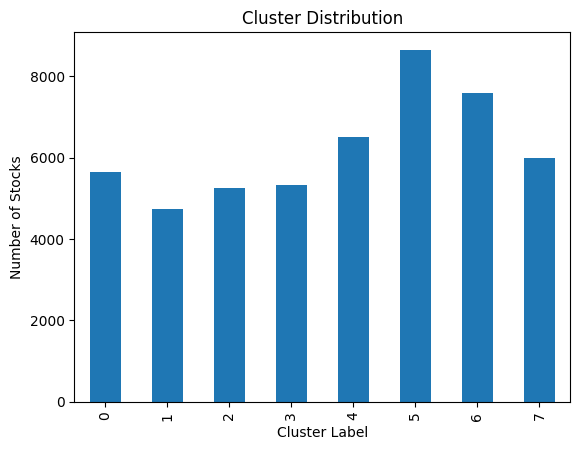

In [121]:
# 确保只有数值列参与分组聚合
numeric_columns = df.select_dtypes(include=['number']).columns

# 统计每个类别的股票数量
cluster_distribution = df.groupby('cluster_label')['ts_code'].count()

# 分析每个类别的特征均值（仅计算数值列的均值）
cluster_features = df.groupby('cluster_label')[numeric_columns].mean()

# 输出类别分布和特征均值
print("Cluster Distribution:")
print(cluster_distribution)  # 输出每个类别中股票的数量

print("\nCluster Feature Means:")
print(cluster_features)  # 输出每个类别的特征均值

# 可视化类别分布
import matplotlib.pyplot as plt

cluster_distribution.plot(kind='bar', title='Cluster Distribution')
plt.xlabel('Cluster Label')  # 设置 X 轴标签
plt.ylabel('Number of Stocks')  # 设置 Y 轴标签
plt.show()  # 显示图形

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [123]:
# 构建二分类目标变量（上涨为 1，不涨为 0）
df['target'] = (df['forward_return'] > 0).astype(int)

In [124]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,0.348123,1.956533e-05,69.359761,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,0.210684,-6.679765e-07,55.517218,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,0.545978,9.126133e-08,55.147955,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.382860,-2.601574e-05,54.606156,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.245859,1.193035e-05,46.016114,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.385811,4.426890e-07,50.365745,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.885035,2.461892e-05,56.824548,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,0.488631,5.064821e-06,69.736587,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,0.228451,3.646363e+00,39.515149,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1


In [125]:
# 使用复合因子数据作为特征
X = df[['composite_factor']]  # 其他因子可以补充进来
y = df['target']

# 按类别分组，分别构建数据集
grouped = df.groupby('cluster_label')

In [126]:
# 定义模型
models = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [127]:
# 参数网格
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

In [128]:
# 保存每个类别的模型结果
cluster_results = {}

for cluster_label, group in grouped:
    print(f"Training models for cluster {cluster_label}...")
    
    # 准备特征和目标
    X_cluster = group[['composite_factor']]
    y_cluster = group['target']
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    cluster_results[cluster_label] = {}
    
    for model_name, model in models.items():
        print(f"Optimizing {model_name}...")
        
        # 使用网格搜索进行参数优化
        grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_train, y_train)
        
        # 最优模型
        best_model = grid.best_estimator_
        cluster_results[cluster_label][model_name] = best_model
        
        # 预测并计算 AUC
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_prob)
        accuracy = accuracy_score(y_test, best_model.predict(X_test))
        
        print(f"Best parameters for {model_name}: {grid.best_params_}")
        print(f"AUC for {model_name} in cluster {cluster_label}: {auc_score:.4f}")
        print(f"Accuracy for {model_name} in cluster {cluster_label}: {accuracy:.4f}")

Training models for cluster 0...
Optimizing SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
AUC for SVM in cluster 0: 0.4987
Accuracy for SVM in cluster 0: 0.5986
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 200}
AUC for Random Forest in cluster 0: 0.4860
Accuracy for Random Forest in cluster 0: 0.5959
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3}
AUC for XGBoost in cluster 0: 0.4594
Accuracy for XGBoost in cluster 0: 0.5986
Training models for cluster 1...
Optimizing SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
AUC for SVM in cluster 1: 0.4936
Accuracy for SVM in cluster 1: 0.5821
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 3, 'n_estimators': 200}
AUC for Random Forest in cluster 1: 0.5179
Accuracy for Random Forest in cluster 1: 0.5789
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3}
AUC for XGBoost in cluster 1: 0.5100
Accuracy for XGBoost in cluster 1: 0.5821
Training models for cluster 2...
Optimizing SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
AUC for SVM in cluster 2: 0.4990
Accuracy for SVM in cluster 2: 0.5618
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 3, 'n_estimators': 200}
AUC for Random Forest in cluster 2: 0.5036
Accuracy for Random Forest in cluster 2: 0.5589
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3}
AUC for XGBoost in cluster 2: 0.5020
Accuracy for XGBoost in cluster 2: 0.5618
Training models for cluster 3...
Optimizing SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
AUC for SVM in cluster 3: 0.4869
Accuracy for SVM in cluster 3: 0.5595
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
AUC for Random Forest in cluster 3: 0.4902
Accuracy for Random Forest in cluster 3: 0.5576
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7}
AUC for XGBoost in cluster 3: 0.4682
Accuracy for XGBoost in cluster 3: 0.5117
Training models for cluster 4...
Optimizing SVM...
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
AUC for SVM in cluster 4: 0.4824
Accuracy for SVM in cluster 4: 0.5948
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 200}
AUC for Random Forest in cluster 4: 0.5008
Accuracy for Random Forest in cluster 4: 0.5948
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5}
AUC for XGBoost in cluster 4: 0.5062
Accuracy for XGBoost in cluster 4: 0.5948
Training models for cluster 5...
Optimizing SVM...
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
AUC for SVM in cluster 5: 0.4913
Accuracy for SVM in cluster 5: 0.5954
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
AUC for Random Forest in cluster 5: 0.5211
Accuracy for Random Forest in cluster 5: 0.5948
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7}
AUC for XGBoost in cluster 5: 0.4982
Accuracy for XGBoost in cluster 5: 0.5728
Training models for cluster 6...
Optimizing SVM...
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
AUC for SVM in cluster 6: 0.4925
Accuracy for SVM in cluster 6: 0.5864
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
AUC for Random Forest in cluster 6: 0.4689
Accuracy for Random Forest in cluster 6: 0.5554
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5}
AUC for XGBoost in cluster 6: 0.4746
Accuracy for XGBoost in cluster 6: 0.5515
Training models for cluster 7...
Optimizing SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
AUC for SVM in cluster 7: 0.4956
Accuracy for SVM in cluster 7: 0.5990
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
AUC for Random Forest in cluster 7: 0.4459
Accuracy for Random Forest in cluster 7: 0.5890
Optimizing XGBoost...


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [14:31:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  w

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7}
AUC for XGBoost in cluster 7: 0.4530
Accuracy for XGBoost in cluster 7: 0.5622


In [129]:
# 保存每只股票的预测概率
for cluster_label, group in grouped:
    for model_name, model in cluster_results[cluster_label].items():
        group[f'{model_name}_predicted_prob'] = model.predict_proba(group[['composite_factor']])[:, 1]

# 合并结果
final_results = pd.concat([group for _, group in grouped], axis=0)
print(final_results.head())

       ts_code  trade_date  open  high   low  close  pre_close  change  \
440  600027.SH    20240927  5.53  5.61  5.47   5.60       5.51    0.09   
441  600027.SH    20240926  5.44  5.51  5.35   5.51       5.43    0.08   
442  600027.SH    20240925  5.55  5.62  5.41   5.43       5.51   -0.08   
443  600027.SH    20240924  5.32  5.56  5.23   5.51       5.28    0.23   
444  600027.SH    20240923  5.08  5.35  5.08   5.28       5.10    0.18   

     pct_chg         vol  ...  volatility_candle_up_std_10  \
440   1.6334   745941.12  ...                     0.439378   
441   1.4733  1132215.95  ...                     0.408268   
442  -1.4519  1220996.61  ...                     0.450352   
443   4.3561   777311.75  ...                     0.591372   
444   3.5294   695814.59  ...                     1.008690   

     volm_vwap_div_ma_diff_20_250  volatility_rvi_20_1  \
440                      0.000047            48.523096   
441                      0.000007            45.921283   
442     

In [130]:
final_results

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volatility_candle_up_std_10,volm_vwap_div_ma_diff_20_250,volatility_rvi_20_1,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target
440,600027.SH,20240927,5.53,5.61,5.47,5.60,5.51,0.09,1.6334,745941.12,...,0.439378,0.000047,48.523096,0.177946,6.779929e-05,0.756687,-0.079156,0.702089,0,0
441,600027.SH,20240926,5.44,5.51,5.35,5.51,5.43,0.08,1.4733,1132215.95,...,0.408268,0.000007,45.921283,0.622375,1.282619e-05,0.741983,-0.053913,0.673609,0,0
442,600027.SH,20240925,5.55,5.62,5.41,5.43,5.51,-0.08,-1.4519,1220996.61,...,0.450352,-0.000021,64.828436,0.216744,4.874224e-05,0.592022,-0.079126,0.388981,0,0
443,600027.SH,20240924,5.32,5.56,5.23,5.51,5.28,0.23,4.3561,777311.75,...,0.591372,0.000009,51.190827,0.297323,1.458136e-05,0.661286,0.050652,0.204731,0,1
444,600027.SH,20240923,5.08,5.35,5.08,5.28,5.10,0.18,3.5294,695814.59,...,1.008690,0.000040,97.955994,0.000000,-3.783122e-05,0.933521,0.037510,0.364890,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49624,688799.SH,20240902,38.50,38.70,37.68,38.11,39.00,-0.89,-2.2821,6879.07,...,0.616382,0.000002,44.083880,0.752481,2.258114e-07,0.791617,0.052162,0.987374,7,1
49625,688799.SH,20240830,40.34,40.34,39.00,39.00,40.15,-1.15,-2.8643,9916.34,...,0.391079,-0.000039,69.227207,0.000000,-9.091036e-06,0.876226,0.037557,0.437149,7,1
49626,688799.SH,20240829,39.83,40.50,39.51,40.15,39.96,0.19,0.4755,4756.41,...,0.487488,-0.000009,44.985712,1.269421,3.151292e-06,0.634550,0.044088,0.773561,7,1
49627,688799.SH,20240828,39.13,40.40,39.05,39.96,39.15,0.81,2.0690,3585.54,...,0.814166,-0.000007,48.740525,0.723225,8.813606e-06,0.765611,-0.017669,0.306367,7,0


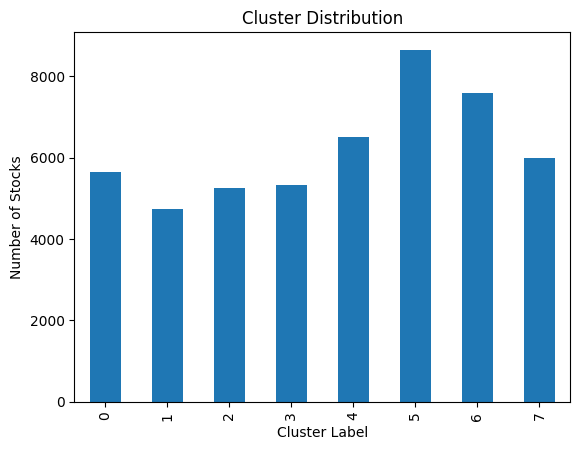

In [131]:
# 绘制类别分布
cluster_distribution.plot(kind='bar', title='Cluster Distribution')
plt.xlabel('Cluster Label')  # 设置 X 轴标签
plt.ylabel('Number of Stocks')  # 设置 Y 轴标签
plt.show()

AUC

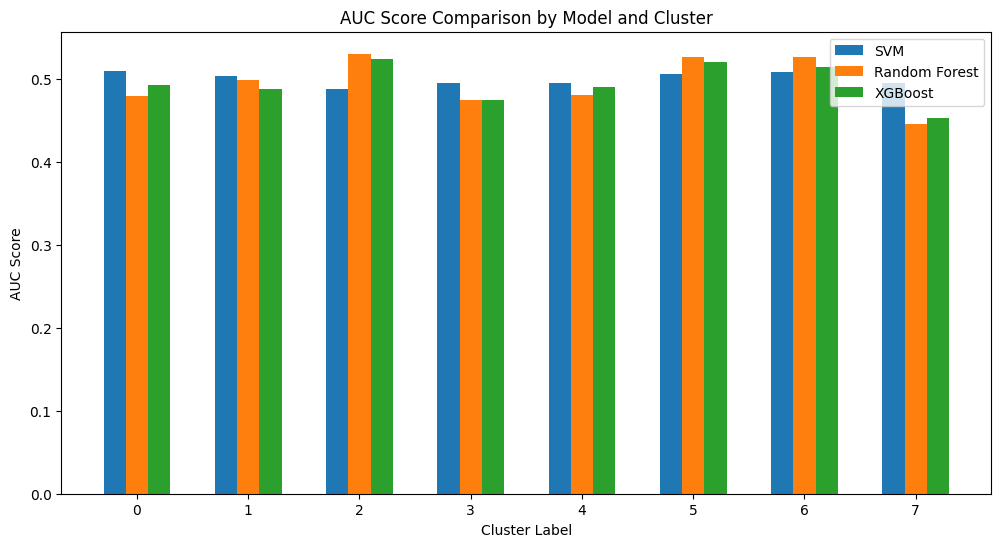

In [132]:
import matplotlib.pyplot as plt

# 准备 AUC 数据
auc_data = {model_name: [] for model_name in models.keys()}

for cluster_label, model_results in cluster_results.items():
    for model_name, best_model in model_results.items():
        y_pred_prob = best_model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_prob)
        auc_data[model_name].append(auc_score)

# 绘制 AUC 对比柱状图
x_labels = list(cluster_results.keys())  # 聚类类别
x = range(len(x_labels))  # X 轴位置

plt.figure(figsize=(12, 6))
bar_width = 0.2  # 每个柱的宽度

# 绘制每种模型的 AUC
for i, (model_name, auc_scores) in enumerate(auc_data.items()):
    plt.bar([p + i * bar_width for p in x], auc_scores, width=bar_width, label=model_name)

plt.xlabel('Cluster Label')
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison by Model and Cluster')
plt.xticks([p + bar_width for p in x], x_labels)  # 设置 X 轴标签位置
plt.legend()
plt.show()

准确率

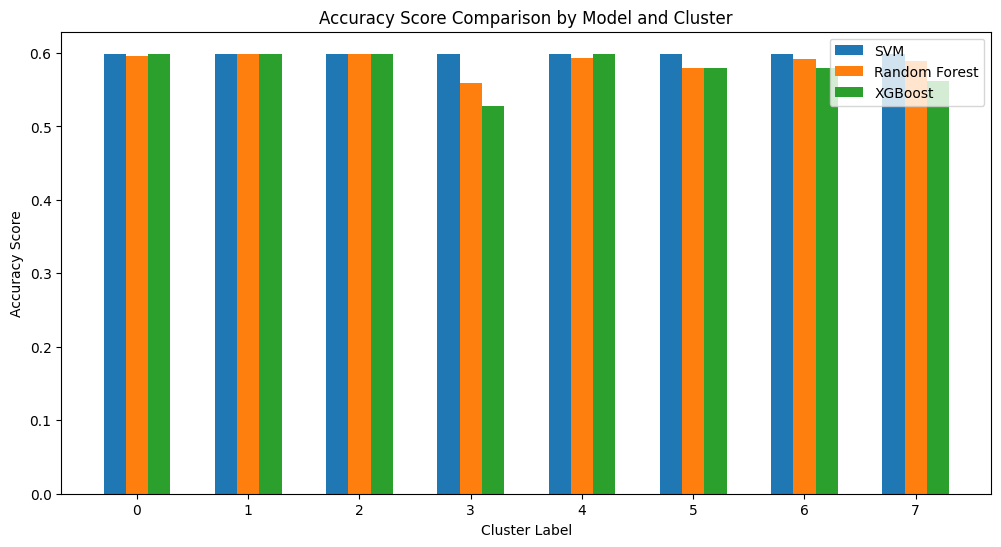

In [133]:
# 准备准确率数据
accuracy_data = {model_name: [] for model_name in models.keys()}

for cluster_label, model_results in cluster_results.items():
    for model_name, best_model in model_results.items():
        accuracy = accuracy_score(y_test, best_model.predict(X_test))
        accuracy_data[model_name].append(accuracy)

# 绘制准确率对比柱状图
plt.figure(figsize=(12, 6))

# 绘制每种模型的准确率
for i, (model_name, accuracy_scores) in enumerate(accuracy_data.items()):
    plt.bar([p + i * bar_width for p in x], accuracy_scores, width=bar_width, label=model_name)

plt.xlabel('Cluster Label')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison by Model and Cluster')
plt.xticks([p + bar_width for p in x], x_labels)  # 设置 X 轴标签位置
plt.legend()
plt.show()

In [138]:
print("Available columns in cluster_0_group:")
print(cluster_0_group.columns)

# 或检查整个数据框
print("Available columns in df:")
print(df.columns)

Available columns in cluster_0_group:
Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol',
       ...
       'volatility_candle_up_std_10', 'volm_vwap_div_ma_diff_20_250',
       'volatility_rvi_20_1', 'trend_candle_up_trend_120',
       'volm_vwap_div_ma_diff_5_60', 'volatility_candle_dn_std_20',
       'forward_return', 'composite_factor', 'cluster_label', 'target'],
      dtype='object', length=189)
Available columns in df:
Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol',
       ...
       'volatility_candle_up_std_10', 'volm_vwap_div_ma_diff_20_250',
       'volatility_rvi_20_1', 'trend_candle_up_trend_120',
       'volm_vwap_div_ma_diff_5_60', 'volatility_candle_dn_std_20',
       'forward_return', 'composite_factor', 'cluster_label', 'target'],
      dtype='object', length=189)


In [139]:
# 保存每个类别的预测概率
for cluster_label, group in grouped:
    for model_name, model in cluster_results[cluster_label].items():
        # 确保预测概率列正确保存
        group[f'{model_name}_predicted_prob'] = model.predict_proba(group[['composite_factor']])[:, 1]

# 合并所有类别的结果
final_results = pd.concat([group for _, group in grouped], axis=0)

In [140]:
# 重新获取类别 0 的数据
cluster_0_group = df[df['cluster_label'] == 0]

# 确保 SVM_predicted_prob 列存在
if 'SVM_predicted_prob' in cluster_0_group.columns:
    svm_probabilities = cluster_0_group['SVM_predicted_prob']

    # 绘制预测概率分布
    plt.hist(svm_probabilities, bins=20, alpha=0.7, label='SVM', color='blue')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution (Cluster 0 - SVM)')
    plt.legend()
    plt.show()
else:
    print("SVM_predicted_prob column is missing.")

SVM_predicted_prob column is missing.


In [141]:
# 确保在训练每个类别的模型后，将预测概率保存到数据框
for cluster_label, group in grouped:
    print(f"Processing cluster {cluster_label}...")
    
    # 准备特征和目标
    X_cluster = group[['composite_factor']]
    y_cluster = group['target']
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    for model_name, model in cluster_results[cluster_label].items():
        # 使用训练好的模型生成预测概率
        predicted_probabilities = model.predict_proba(X_cluster)[:, 1]
        
        # 保存预测概率到对应的列
        df.loc[group.index, f'{model_name}_predicted_prob'] = predicted_probabilities

Processing cluster 0...
Processing cluster 1...
Processing cluster 2...
Processing cluster 3...
Processing cluster 4...
Processing cluster 5...
Processing cluster 6...
Processing cluster 7...


In [142]:
# 检查所有预测概率列是否存在
predicted_prob_columns = [f'{model_name}_predicted_prob' for model_name in models.keys()]
print("Predicted probability columns:")
print([col for col in predicted_prob_columns if col in df.columns])

Predicted probability columns:
['SVM_predicted_prob', 'Random Forest_predicted_prob', 'XGBoost_predicted_prob']


In [143]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1,0.594522,0.591667,0.527783
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0,0.576465,0.548376,0.580467
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0,0.591682,0.578082,0.582160
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1,0.591757,0.571923,0.513031
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1,0.584054,0.600901,0.487108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1,0.538397,0.554036,0.419496
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0,0.548237,0.597938,0.693969
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0,0.545657,0.432630,0.314437
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1,0.543388,0.575804,0.638100


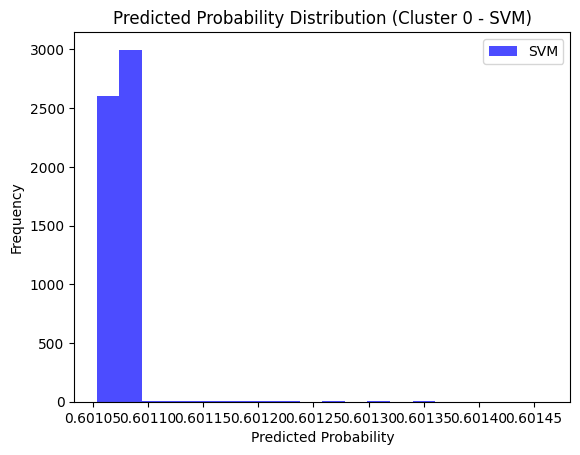

In [144]:
# 获取类别 0 的数据
cluster_0_group = df[df['cluster_label'] == 0]

# 检查是否存在 SVM_predicted_prob 列
if 'SVM_predicted_prob' in cluster_0_group.columns:
    # 提取预测概率
    svm_probabilities = cluster_0_group['SVM_predicted_prob']

    # 绘制直方图
    plt.hist(svm_probabilities, bins=20, alpha=0.7, label='SVM', color='blue')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Predicted Probability Distribution (Cluster 0 - SVM)')
    plt.legend()
    plt.show()
else:
    print("SVM_predicted_prob column is still missing.")

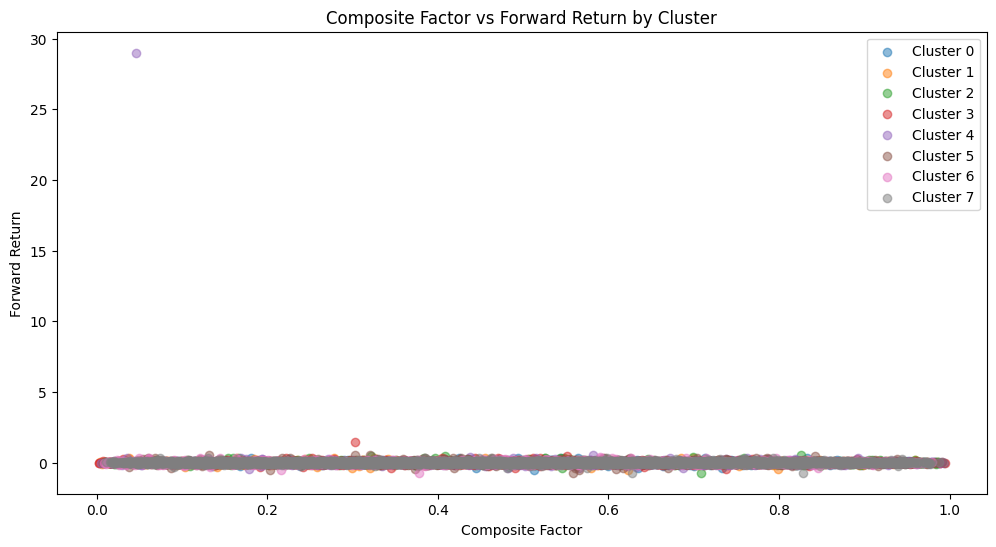

In [135]:
# 绘制复合因子与收益率的散点图
plt.figure(figsize=(12, 6))
for cluster_label, group in grouped:
    plt.scatter(group['composite_factor'], group['forward_return'], alpha=0.5, label=f'Cluster {cluster_label}')

plt.xlabel('Composite Factor')
plt.ylabel('Forward Return')
plt.title('Composite Factor vs Forward Return by Cluster')
plt.legend()
plt.show()

In [146]:
# 确保所有类别的数据都有 SVM_predicted_prob 列，并填充缺失值
for cluster_label, group in grouped:
    if 'SVM_predicted_prob' not in group.columns:
        df.loc[group.index, 'SVM_predicted_prob'] = np.nan  # 填充 NaN

In [147]:
# 对每个类别填充缺失的股票并对齐
max_length = max(len(group) for _, group in grouped)  # 找到最长的类别

heatmap_data = pd.DataFrame({
    cluster_label: np.pad(
        group['SVM_predicted_prob'].values, 
        (0, max_length - len(group)),  # 填充到相同长度
        constant_values=np.nan
    )
    for cluster_label, group in grouped
}).T

In [148]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1,0.594522,0.591667,0.527783
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0,0.576465,0.548376,0.580467
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0,0.591682,0.578082,0.582160
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1,0.591757,0.571923,0.513031
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1,0.584054,0.600901,0.487108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1,0.538397,0.554036,0.419496
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0,0.548237,0.597938,0.693969
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0,0.545657,0.432630,0.314437
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1,0.543388,0.575804,0.638100


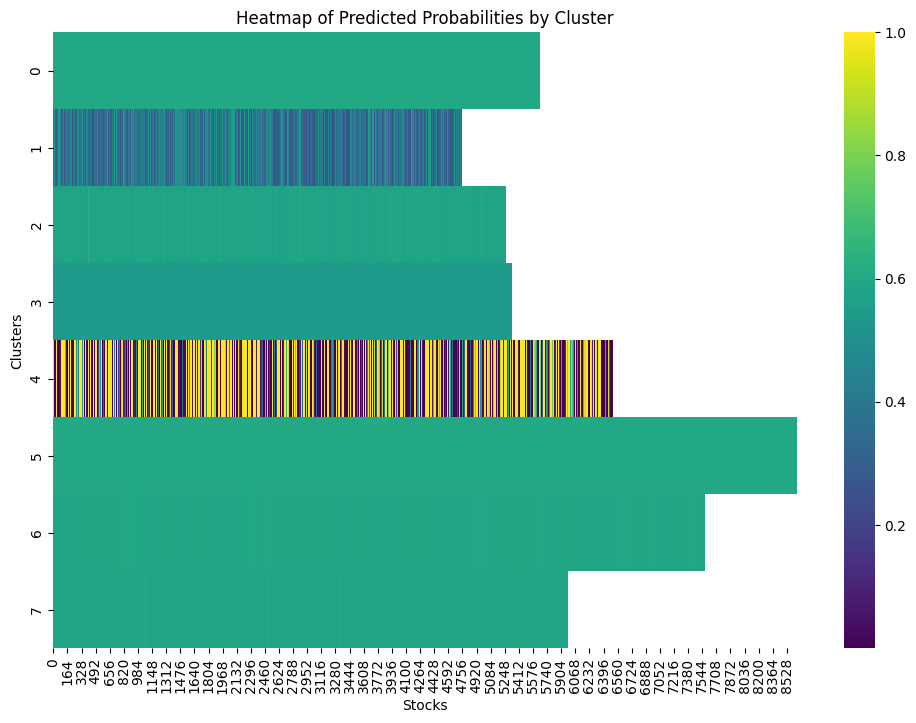

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar=True)
plt.title('Heatmap of Predicted Probabilities by Cluster')
plt.xlabel('Stocks')
plt.ylabel('Clusters')
plt.show()

In [151]:
print("Available columns in final_results:")
print(final_results.columns)

Available columns in final_results:
Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol',
       ...
       'volatility_candle_up_std_10', 'volm_vwap_div_ma_diff_20_250',
       'volatility_rvi_20_1', 'trend_candle_up_trend_120',
       'volm_vwap_div_ma_diff_5_60', 'volatility_candle_dn_std_20',
       'forward_return', 'composite_factor', 'cluster_label', 'target'],
      dtype='object', length=189)


In [152]:
# 在每个类别中生成预测概率并保存
for cluster_label, group in grouped:
    for model_name, model in cluster_results[cluster_label].items():
        # 确保预测概率正确保存
        predicted_probabilities = model.predict_proba(group[['composite_factor']])[:, 1]
        df.loc[group.index, f'{model_name}_predicted_prob'] = predicted_probabilities

# 确保所有分组数据正确合并到 final_results
final_results = df.copy()

In [153]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1,0.594522,0.591667,0.527783
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0,0.576465,0.548376,0.580467
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0,0.591682,0.578082,0.582160
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1,0.591757,0.571923,0.513031
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1,0.584054,0.600901,0.487108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1,0.538397,0.554036,0.419496
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0,0.548237,0.597938,0.693969
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0,0.545657,0.432630,0.314437
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1,0.543388,0.575804,0.638100


In [154]:
final_results

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1,0.594522,0.591667,0.527783
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0,0.576465,0.548376,0.580467
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0,0.591682,0.578082,0.582160
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1,0.591757,0.571923,0.513031
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1,0.584054,0.600901,0.487108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1,0.538397,0.554036,0.419496
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0,0.548237,0.597938,0.693969
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0,0.545657,0.432630,0.314437
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1,0.543388,0.575804,0.638100


Top 10 Stocks by Predicted Probability (SVM):
         ts_code  SVM_predicted_prob  forward_return
30601  603669.SH                 1.0        0.003001
20568  601828.SH                 1.0       -0.021739
38237  688061.SH                 1.0       -0.034601
20701  601866.SH                 1.0       -0.044032
30008  603617.SH                 1.0        0.040689
24039  603125.SH                 1.0       -0.036211
35950  605208.SH                 1.0        0.003791
11652  600696.SH                 1.0        0.044138
30568  603668.SH                 1.0        0.008387
33226  603895.SH                 1.0       -0.001938


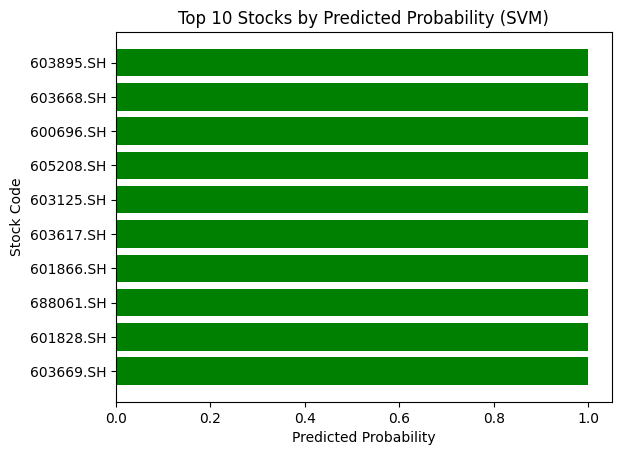

In [155]:
# 检查是否存在 SVM_predicted_prob 列
if 'SVM_predicted_prob' in final_results.columns:
    # 按预测概率排序并查看前 10 名股票
    top_stocks = final_results.sort_values(by='SVM_predicted_prob', ascending=False).head(10)
    print("Top 10 Stocks by Predicted Probability (SVM):")
    print(top_stocks[['ts_code', 'SVM_predicted_prob', 'forward_return']])

    # 绘制 Top 10 股票的预测概率
    plt.barh(top_stocks['ts_code'], top_stocks['SVM_predicted_prob'], color='green')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Stock Code')
    plt.title('Top 10 Stocks by Predicted Probability (SVM)')
    plt.show()
else:
    print("SVM_predicted_prob column is missing in final_results.")

In [156]:
# 创建三个独立的投资组合，每个对应一种机器学习模型
model_names = ['SVM', 'Random Forest', 'XGBoost']
portfolios = {model: [] for model in model_names}

# 对每个聚类类别选择股票
for cluster_label, group in grouped:
    for model_name in model_names:
        predicted_prob_column = f'{model_name}_predicted_prob'
        
        # 确保列存在
        if predicted_prob_column in group.columns:
            # 选择预测上涨概率最高的股票
            top_stock = group.loc[group[predicted_prob_column].idxmax()]
            portfolios[model_name].append(top_stock)

# 将每个组合转换为数据框
portfolios = {model: pd.DataFrame(stocks) for model, stocks in portfolios.items()}

# 输出各组合的选股情况
for model, portfolio in portfolios.items():
    print(f"Portfolio for {model}:")
    print(portfolio[['ts_code', f'{model}_predicted_prob', 'forward_return']])

Portfolio for SVM:
         ts_code  SVM_predicted_prob  forward_return
20121  601700.SH            0.601462       -0.006928
11782  600704.SH            0.609621        0.078744
8448   600518.SH            0.683847        0.015967
19033  601377.SH            0.550801       -0.025362
916    600058.SH            1.000000       -0.020565
41599  688233.SH            0.606356        0.020220
18453  601222.SH            0.615129        0.018196
546    600031.SH            0.596868        0.015244
Portfolio for Random Forest:
         ts_code  Random Forest_predicted_prob  forward_return
7837   600487.SH                      0.820729        0.011568
1501   600096.SH                      0.633773        0.029274
5846   600353.SH                      0.631775        0.003464
5562   600335.SH                      0.954602        0.019900
3240   600193.SH                      0.855317        0.007146
24878  603181.SH                      0.818090       -0.018911
19871  601666.SH                  

In [157]:
portfolios

{'SVM':          ts_code  trade_date   open   high    low  close  pre_close  change  \
 20121  601700.SH    20240829   3.62   3.73   3.59   3.72       3.62    0.10   
 11782  600704.SH    20240912   4.06   4.09   4.04   4.04       4.06   -0.02   
 8448   600518.SH    20240830   1.80   1.83   1.79   1.82       1.80    0.02   
 19033  601377.SH    20240912   5.10   5.14   5.08   5.13       5.10    0.03   
 916    600058.SH    20240905   6.08   6.19   6.06   6.15       6.10    0.05   
 41599  688233.SH    20240829  14.34  14.97  14.32  14.84      14.50    0.34   
 18453  601222.SH    20240926   6.81   6.89   6.62   6.88       6.85    0.03   
 546    600031.SH    20240830  15.76  16.25  15.35  16.12      15.88    0.24   
 
        pct_chg         vol  ...  trend_candle_up_trend_120  \
 20121   2.7624    81738.67  ...                   0.705535   
 11782  -0.4926   192479.27  ...                   0.000000   
 8448    1.1111  1130229.31  ...                   0.341334   
 19033   0.5882   1

In [161]:
# 提取收益率列
returns_matrix = portfolio[['forward_return']].copy()

In [163]:
returns_matrix

,forward_return
20121,-0.006928
11782,0.078744
8448,0.015967
19033,-0.025362
916,-0.020565
41599,0.020220
18453,0.018196
546,0.015244


In [162]:
cov_matrix = returns_matrix.cov()  # 自动计算所有资产之间的协方差

In [164]:
cov_matrix

,forward_return
forward_return,0.001057


In [165]:
# 计算每个组合的均值和协方差矩阵
for model, portfolio in portfolios.items():
    # 提取收益率矩阵（此处为单列，但可以扩展为多个因子收益率）
    returns_matrix = portfolio[['forward_return']].copy()
    
    # 计算均值和协方差矩阵
    mean_returns = returns_matrix.mean().values  # 平均收益率
    cov_matrix = returns_matrix.cov().values     # 协方差矩阵

    print(f"Mean returns for {model}: {mean_returns}")
    print(f"Covariance matrix for {model}:\n{cov_matrix}")

Mean returns for SVM: [0.01193939]
Covariance matrix for SVM:
[[0.00105736]]
Mean returns for Random Forest: [0.01002257]
Covariance matrix for Random Forest:
[[0.00019891]]
Mean returns for XGBoost: [0.00951744]
Covariance matrix for XGBoost:
[[0.00042944]]


In [166]:
print(returns_matrix.head())

      forward_return
1719        0.001535
887        -0.000751
836        -0.014519
3546        0.026275
1680        0.004583


In [167]:
print(f"Covariance matrix shape: {cov_matrix.shape}")

Covariance matrix shape: (1, 1)


In [168]:
for model, portfolio in portfolios.items():
    print(f"Number of assets in {model} portfolio: {len(portfolio)}")

Number of assets in SVM portfolio: 8
Number of assets in Random Forest portfolio: 8
Number of assets in XGBoost portfolio: 8


In [169]:
# 提取收益率矩阵
returns_matrix = portfolio[['forward_return']].copy()

# 检查数据
print("Returns matrix for portfolio:")
print(returns_matrix.head())

Returns matrix for portfolio:
      forward_return
1719        0.001535
887        -0.000751
836        -0.014519
3546        0.026275
1680        0.004583


In [170]:
# 重构收益率矩阵：将每只资产作为列
returns_matrix = portfolio.pivot(columns='ts_code', values='forward_return')

# 检查矩阵维度
print("Returns matrix shape:", returns_matrix.shape)
print(returns_matrix.head())

# 计算协方差矩阵
cov_matrix = returns_matrix.cov()
print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix:\n", cov_matrix)

Returns matrix shape: (8, 8)
ts_code  600021.SH  600050.SH  600055.SH  600057.SH  600079.SH  600105.SH  \
342       0.047114        NaN        NaN        NaN        NaN        NaN   
746            NaN   0.021999        NaN        NaN        NaN        NaN   
836            NaN        NaN  -0.014519        NaN        NaN        NaN   
887            NaN        NaN        NaN  -0.000751        NaN        NaN   
1256           NaN        NaN        NaN        NaN  -0.010097        NaN   

ts_code  600107.SH  600211.SH  
342            NaN        NaN  
746            NaN        NaN  
836            NaN        NaN  
887            NaN        NaN  
1256           NaN        NaN  
Covariance matrix shape: (8, 8)
Covariance matrix:
 ts_code    600021.SH  600050.SH  600055.SH  600057.SH  600079.SH  600105.SH  \
ts_code                                                                       
600021.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600050.SH        NaN       

In [171]:
# 计算每个组合的均值和协方差矩阵
for model, portfolio in portfolios.items():
    # 将收益率矩阵重构为多列
    returns_matrix = portfolio.pivot(columns='ts_code', values='forward_return')
    
    # 计算均值
    mean_returns = returns_matrix.mean()  # 每只股票的平均收益率
    cov_matrix = returns_matrix.cov()    # 协方差矩阵

    print(f"Mean returns for {model}:\n{mean_returns}")
    print(f"Covariance matrix for {model}:\n{cov_matrix}")
    print(f"Covariance matrix shape: {cov_matrix.shape}")

Mean returns for SVM:
ts_code
600031.SH    0.015244
600058.SH   -0.020565
600518.SH    0.015967
600704.SH    0.078744
601222.SH    0.018196
601377.SH   -0.025362
601700.SH   -0.006928
688233.SH    0.020220
dtype: float64
Covariance matrix for SVM:
ts_code    600031.SH  600058.SH  600518.SH  600704.SH  601222.SH  601377.SH  \
ts_code                                                                       
600031.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600058.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600518.SH        NaN        NaN        NaN        NaN        NaN        NaN   
600704.SH        NaN        NaN        NaN        NaN        NaN        NaN   
601222.SH        NaN        NaN        NaN        NaN        NaN        NaN   
601377.SH        NaN        NaN        NaN        NaN        NaN        NaN   
601700.SH        NaN        NaN        NaN        NaN        NaN        NaN   
688233.SH        NaN        NaN        Na

In [159]:
# 等权重分配
for model, portfolio in portfolios.items():
    n_assets = len(portfolio)
    weights_equal = np.ones(n_assets) / n_assets  # 每个资产的权重相等
    
    portfolio['equal_weight'] = weights_equal
    print(f"Equal weights for {model}:\n", portfolio[['ts_code', 'equal_weight']])

Equal weights for SVM:
          ts_code  equal_weight
20121  601700.SH         0.125
11782  600704.SH         0.125
8448   600518.SH         0.125
19033  601377.SH         0.125
916    600058.SH         0.125
41599  688233.SH         0.125
18453  601222.SH         0.125
546    600031.SH         0.125
Equal weights for Random Forest:
          ts_code  equal_weight
7837   600487.SH         0.125
1501   600096.SH         0.125
5846   600353.SH         0.125
5562   600335.SH         0.125
3240   600193.SH         0.125
24878  603181.SH         0.125
19871  601666.SH         0.125
546    600031.SH         0.125
Equal weights for XGBoost:
         ts_code  equal_weight
1719  600107.SH         0.125
887   600057.SH         0.125
836   600055.SH         0.125
3546  600211.SH         0.125
1680  600105.SH         0.125
1256  600079.SH         0.125
746   600050.SH         0.125
342   600021.SH         0.125


In [173]:
# 用 0 填充缺失值
returns_matrix = returns_matrix.fillna(0)

# 或者，用列均值填充
returns_matrix = returns_matrix.fillna(returns_matrix.mean())

# 检查修复后的矩阵
print("Returns matrix after filling NaN:")
print(returns_matrix.head())

Returns matrix after filling NaN:
ts_code  600021.SH  600050.SH  600055.SH  600057.SH  600079.SH  600105.SH  \
342       0.047114   0.000000   0.000000   0.000000   0.000000        0.0   
746       0.000000   0.021999   0.000000   0.000000   0.000000        0.0   
836       0.000000   0.000000  -0.014519   0.000000   0.000000        0.0   
887       0.000000   0.000000   0.000000  -0.000751   0.000000        0.0   
1256      0.000000   0.000000   0.000000   0.000000  -0.010097        0.0   

ts_code  600107.SH  600211.SH  
342            0.0        0.0  
746            0.0        0.0  
836            0.0        0.0  
887            0.0        0.0  
1256           0.0        0.0  


In [175]:
# 提取收益率矩阵：每只股票一列
returns_matrix = portfolio.pivot(columns='ts_code', values='forward_return')

# 处理缺失值
returns_matrix = returns_matrix.fillna(0)  # 可以选择用 0 填充或其他方法

# 计算协方差矩阵
cov_matrix = returns_matrix.cov()

In [176]:
cov_matrix

ts_code,600031.SH,600058.SH,600518.SH,600704.SH,601222.SH,601377.SH,601700.SH,688233.SH
ts_code,,,,,,,,
600031.SH,0.000029,0.000006,-0.000004,-0.000021,-0.000005,0.000007,0.000002,-0.000006
600058.SH,0.000006,0.000053,0.000006,0.000029,0.000007,-0.000009,-0.000003,0.000007
600518.SH,-0.000004,0.000006,0.000032,-0.000022,-0.000005,0.000007,0.000002,-0.000006
600704.SH,-0.000021,0.000029,-0.000022,0.000775,-0.000026,0.000036,0.000010,-0.000028
601222.SH,-0.000005,0.000007,-0.000005,-0.000026,0.000041,0.000008,0.000002,-0.000007
601377.SH,0.000007,-0.000009,0.000007,0.000036,0.000008,0.000080,-0.000003,0.000009
601700.SH,0.000002,-0.000003,0.000002,0.000010,0.000002,-0.000003,0.000006,0.000003
688233.SH,-0.000006,0.000007,-0.000006,-0.000028,-0.000007,0.000009,0.000003,0.000051


In [177]:
from scipy.optimize import minimize

def minimize_risk(cov_matrix):
    n_assets = cov_matrix.shape[0]  # 协方差矩阵的维度
    init_guess = np.ones(n_assets) / n_assets  # 初始均匀权重
    bounds = [(0.0, 1.0) for _ in range(n_assets)]  # 权重范围
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  # 权重和为1

    # 最小化组合方差
    result = minimize(
        lambda weights: weights.T @ cov_matrix @ weights,  # 目标函数：组合方差
        init_guess,
        bounds=bounds,
        constraints=constraints
    )
    return result.x  # 返回最优权重

In [179]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,trend_candle_up_trend_120,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob
0,600000.SH,20240927,9.99,10.08,9.60,9.87,9.84,0.03,0.3049,570394.67,...,1.517982,3.891964e-05,0.557263,0.007192,0.103958,7,1,0.594522,0.591667,0.527783
1,600000.SH,20240926,9.50,9.84,9.43,9.84,9.49,0.35,3.6881,898390.05,...,-0.000000,1.922441e-06,0.590691,-0.060879,0.822281,7,0,0.576465,0.548376,0.580467
2,600000.SH,20240925,9.27,9.55,9.25,9.49,9.09,0.40,4.4004,1190635.22,...,1.042958,7.646870e-07,0.678743,-0.021101,0.216863,7,0,0.591682,0.578082,0.582160
3,600000.SH,20240924,8.75,9.09,8.66,9.09,8.63,0.46,5.3302,892080.35,...,0.029155,4.845217e-05,1.100997,0.012392,0.213902,7,1,0.591757,0.571923,0.513031
4,600000.SH,20240923,8.53,8.65,8.46,8.63,8.51,0.12,1.4101,300238.95,...,0.525294,8.269188e-05,0.705376,0.039801,0.520289,7,1,0.584054,0.600901,0.487108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712,689009.SH,20240902,45.48,46.40,45.00,45.14,44.70,0.44,0.9843,104998.02,...,0.914133,3.069617e-06,0.711960,0.030646,0.873100,3,1,0.538397,0.554036,0.419496
49713,689009.SH,20240830,47.88,49.00,44.44,44.70,48.02,-3.32,-6.9138,142898.15,...,0.298678,2.879405e-05,0.597886,-0.006741,0.182833,3,0,0.548237,0.597938,0.693969
49714,689009.SH,20240829,46.00,48.28,45.62,48.02,46.10,1.92,4.1649,53024.80,...,1.411911,1.508551e-06,0.756947,-0.016393,0.363924,3,0,0.545657,0.432630,0.314437
49715,689009.SH,20240828,46.45,47.04,45.52,46.10,46.45,-0.35,-0.7535,35325.03,...,-0.000000,4.901779e+00,1.005057,0.005511,0.523068,3,1,0.543388,0.575804,0.638100


In [196]:
portfolio

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volm_vwap_div_ma_diff_5_60,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob,equal_weight
1719,600107.SH,20240919,4.01,4.32,3.93,4.06,3.93,0.13,3.3079,285983.30,...,3.661192e-05,0.840176,0.001535,0.422215,0,1,6.010880e-01,0.661960,0.664747,0.125
887,600057.SH,20240918,4.70,4.74,4.61,4.74,4.69,0.05,1.0661,161224.97,...,1.547929e-05,0.803273,-0.000751,0.458440,1,0,3.907182e-01,0.623856,0.672155,0.125
836,600055.SH,20240927,13.34,13.80,13.29,13.78,13.22,0.56,4.2360,53912.96,...,5.402466e-07,0.790681,-0.014519,0.792376,2,0,5.843350e-01,0.626777,0.645951,0.125
3546,600211.SH,20240906,33.99,34.04,33.20,33.21,33.91,-0.70,-2.0643,19492.22,...,1.426778e-05,0.921412,0.026275,0.492294,3,1,5.438271e-01,0.634608,0.830218,0.125
1680,600105.SH,20240910,3.56,3.61,3.47,3.59,3.54,0.05,1.4124,240137.32,...,-6.244939e-07,0.674739,0.004583,0.936668,4,1,8.277160e-07,0.785992,0.729906,0.125
1256,600079.SH,20240920,16.08,16.18,15.81,16.06,16.08,-0.02,-0.1244,134154.11,...,1.452462e-04,0.734257,-0.010097,0.568329,5,0,6.026445e-01,0.722404,0.802238,0.125
746,600050.SH,20240828,4.81,4.82,4.76,4.79,4.81,-0.02,-0.4158,1098238.29,...,3.905918e-06,0.597556,0.021999,0.137793,6,1,5.898791e-01,0.711187,0.881610,0.125
342,600021.SH,20240909,8.38,8.38,8.19,8.23,8.40,-0.17,-2.0238,141991.00,...,3.713589e-05,0.853654,0.047114,0.145853,7,1,5.934684e-01,0.717581,0.880693,0.125


In [195]:
portfolio = portfolio.drop(columns=['min_risk_weight'])

In [188]:
returns_matrix

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
342,0.047114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
746,0.000000,0.021999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
836,0.000000,0.000000,-0.014519,0.000000,0.000000,0.000000,0.000000,0.000000
887,0.000000,0.000000,0.000000,-0.000751,0.000000,0.000000,0.000000,0.000000
1256,0.000000,0.000000,0.000000,0.000000,-0.010097,0.000000,0.000000,0.000000
1680,0.000000,0.000000,0.000000,0.000000,0.000000,0.004583,0.000000,0.000000
1719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000
3546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026275


In [187]:
print("Covariance matrix for SVM portfolio:")
print(cov_matrix)

Covariance matrix for SVM portfolio:
ts_code       600021.SH     600050.SH     600055.SH     600057.SH  \
ts_code                                                             
600021.SH  2.774660e-04 -1.850781e-05  1.221519e-05  6.315040e-07   
600050.SH -1.850781e-05  6.049180e-05  5.703528e-06  2.948625e-07   
600055.SH  1.221519e-05  5.703528e-06  2.635037e-05 -1.946098e-07   
600057.SH  6.315040e-07  2.948625e-07 -1.946098e-07  7.042690e-08   
600079.SH  8.494569e-06  3.966292e-06 -2.617760e-06 -1.353336e-07   
600105.SH -3.855734e-06 -1.800323e-06  1.188217e-06  6.142872e-08   
600107.SH -1.291691e-06 -6.031175e-07  3.980586e-07  2.057894e-08   
600211.SH -2.210581e-05 -1.032167e-05  6.812319e-06  3.521850e-07   

ts_code       600079.SH     600105.SH     600107.SH     600211.SH  
ts_code                                                            
600021.SH  8.494569e-06 -3.855734e-06 -1.291691e-06 -2.210581e-05  
600050.SH  3.966292e-06 -1.800323e-06 -6.031175e-07 -1.032167e-05  


In [189]:
returns_matrix_001 = portfolio.pivot(columns='ts_code', values='forward_return')

In [190]:
returns_matrix_001

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
342,0.047114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,NaN,0.021999,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,-0.014519,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,-0.000751,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,-0.010097,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,0.004583,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN,NaN,0.001535,NaN
3546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026275


In [191]:
returns_matrix_001 = returns_matrix_001.fillna(returns_matrix_001.mean())

In [192]:
returns_matrix_001

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
342,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
746,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
836,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
887,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
1256,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
1680,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
1719,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
3546,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275


In [193]:
for model, portfolio in portfolios.items():
    # 提取收益率矩阵
    returns_matrix_001 = portfolio.pivot(columns='ts_code', values='forward_return')
    
    # 处理缺失值
    returns_matrix_001 = returns_matrix_001.fillna(0)
    
    # 计算协方差矩阵
    cov_matrix_001 = returns_matrix_001.cov()
    
    # 计算最小风险的权重
    weights_min_risk_001 = minimize_risk(cov_matrix_001)
    
    # 添加权重到组合
    portfolio['min_risk_weight'] = weights_min_risk_001
    
    print(f"Minimum risk weights for {model}:\n", portfolio[['ts_code', 'min_risk_weight']])

Minimum risk weights for SVM:
          ts_code  min_risk_weight
20121  601700.SH            0.125
11782  600704.SH            0.125
8448   600518.SH            0.125
19033  601377.SH            0.125
916    600058.SH            0.125
41599  688233.SH            0.125
18453  601222.SH            0.125
546    600031.SH            0.125
Minimum risk weights for Random Forest:
          ts_code  min_risk_weight
7837   600487.SH            0.125
1501   600096.SH            0.125
5846   600353.SH            0.125
5562   600335.SH            0.125
3240   600193.SH            0.125
24878  603181.SH            0.125
19871  601666.SH            0.125
546    600031.SH            0.125
Minimum risk weights for XGBoost:
         ts_code  min_risk_weight
1719  600107.SH            0.125
887   600057.SH            0.125
836   600055.SH            0.125
3546  600211.SH            0.125
1680  600105.SH            0.125
1256  600079.SH            0.125
746   600050.SH            0.125
342   600021.SH  

In [198]:
returns_matrix_002 = portfolio.pivot(columns='ts_code', values='forward_return')

In [199]:
returns_matrix_002

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
342,0.047114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,NaN,0.021999,NaN,NaN,NaN,NaN,NaN,NaN
836,NaN,NaN,-0.014519,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,-0.000751,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,-0.010097,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,0.004583,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN,NaN,0.001535,NaN
3546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026275


In [201]:
# 检查每列非缺失值数量，并逐列填充
for column in data.columns:
    non_nan_count = data[column].notna().sum()
    print(f"Column: {column}, Non-NaN count: {non_nan_count}")
    
    if non_nan_count >= 2:
        print(f"Filling missing values for column: {column}")
        data = fill_nan_with_nn(data, column)
    else:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)
        print(f"Column {column}: Filled with mean value {mean_value}")

# 检查填充后的数据
print("Filled data:")
print(data)

Column: 600021.SH, Non-NaN count: 1
Column 600021.SH: Filled with mean value 0.0471139890588365
Column: 600050.SH, Non-NaN count: 1
Column 600050.SH: Filled with mean value 0.0219985085756897
Column: 600055.SH, Non-NaN count: 1
Column 600055.SH: Filled with mean value -0.0145190562613455
Column: 600057.SH, Non-NaN count: 1
Column 600057.SH: Filled with mean value -0.0007506098705227
Column: 600079.SH, Non-NaN count: 1
Column 600079.SH: Filled with mean value -0.0100967007963594
Column: 600105.SH, Non-NaN count: 1
Column 600105.SH: Filled with mean value 0.0045829514207151
Column: 600107.SH, Non-NaN count: 1
Column 600107.SH: Filled with mean value 0.0015353121801433
Column: 600211.SH, Non-NaN count: 1
Column 600211.SH: Filled with mean value 0.0262751159196321
Filled data:
ts_code  600021.SH  600050.SH  600055.SH  600057.SH  600079.SH  600105.SH  \
342       0.047114   0.021999  -0.014519  -0.000751  -0.010097   0.004583   
746       0.047114   0.021999  -0.014519  -0.000751  -0.010097

In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 假设你的数据是 returns_matrix_002
data = returns_matrix_002.copy()

# 填充函数：使用神经网络填充单列缺失值
def fill_nan_with_nn(data, target_column):
    """
    用神经网络预测填充单列缺失值
    """
    # 分离非缺失和缺失值
    non_nan_data = data[~data[target_column].isna()]
    nan_data = data[data[target_column].isna()]

    if nan_data.empty:
        return data  # 如果没有缺失值，直接返回

    # 特征和目标
    X = non_nan_data.drop(columns=[target_column]).values
    y = non_nan_data[target_column].values
    X_missing = nan_data.drop(columns=[target_column]).values

    # 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_missing_scaled = scaler.transform(X_missing)

    # 分割数据集
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 构建神经网络模型
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

    # 训练模型
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0, batch_size=16)

    # 用模型预测缺失值
    predicted_values = model.predict(X_missing_scaled).flatten()

    # 填充缺失值
    data.loc[data[target_column].isna(), target_column] = predicted_values

    return data

# 遍历每一列进行填充
for column in data.columns:
    print(f"Filling missing values for column: {column}")
    data = fill_nan_with_nn(data, column)

# 检查填充后的数据
print("Filled data:")
print(data)

Filling missing values for column: 600021.SH


/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/pythonProject/lib/python3.8/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [204]:
portfolio

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,volatility_candle_dn_std_20,forward_return,composite_factor,cluster_label,target,SVM_predicted_prob,Random Forest_predicted_prob,XGBoost_predicted_prob,equal_weight,min_risk_weight
1719,600107.SH,20240919,4.01,4.32,3.93,4.06,3.93,0.13,3.3079,285983.30,...,0.840176,0.001535,0.422215,0,1,6.010880e-01,0.661960,0.664747,0.125,0.125
887,600057.SH,20240918,4.70,4.74,4.61,4.74,4.69,0.05,1.0661,161224.97,...,0.803273,-0.000751,0.458440,1,0,3.907182e-01,0.623856,0.672155,0.125,0.125
836,600055.SH,20240927,13.34,13.80,13.29,13.78,13.22,0.56,4.2360,53912.96,...,0.790681,-0.014519,0.792376,2,0,5.843350e-01,0.626777,0.645951,0.125,0.125
3546,600211.SH,20240906,33.99,34.04,33.20,33.21,33.91,-0.70,-2.0643,19492.22,...,0.921412,0.026275,0.492294,3,1,5.438271e-01,0.634608,0.830218,0.125,0.125
1680,600105.SH,20240910,3.56,3.61,3.47,3.59,3.54,0.05,1.4124,240137.32,...,0.674739,0.004583,0.936668,4,1,8.277160e-07,0.785992,0.729906,0.125,0.125
1256,600079.SH,20240920,16.08,16.18,15.81,16.06,16.08,-0.02,-0.1244,134154.11,...,0.734257,-0.010097,0.568329,5,0,6.026445e-01,0.722404,0.802238,0.125,0.125
746,600050.SH,20240828,4.81,4.82,4.76,4.79,4.81,-0.02,-0.4158,1098238.29,...,0.597556,0.021999,0.137793,6,1,5.898791e-01,0.711187,0.881610,0.125,0.125
342,600021.SH,20240909,8.38,8.38,8.19,8.23,8.40,-0.17,-2.0238,141991.00,...,0.853654,0.047114,0.145853,7,1,5.934684e-01,0.717581,0.880693,0.125,0.125


In [205]:
returns_matrix

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
trade_date,,,,,,,,
20240828,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240906,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240909,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240910,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240918,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240919,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240920,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275
20240927,0.047114,0.021999,-0.014519,-0.000751,-0.010097,0.004583,0.001535,0.026275


In [207]:
returns_matrix

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
trade_date,,,,,,,,
20240828,0.000000,0.021999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20240906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026275
20240909,0.047114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20240910,0.000000,0.000000,0.000000,0.000000,0.000000,0.004583,0.000000,0.000000
20240918,0.000000,0.000000,0.000000,-0.000751,0.000000,0.000000,0.000000,0.000000
20240919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000
20240920,0.000000,0.000000,0.000000,0.000000,-0.010097,0.000000,0.000000,0.000000
20240927,0.000000,0.000000,-0.014519,0.000000,0.000000,0.000000,0.000000,0.000000


In [206]:
for model, portfolio in portfolios.items():
    # 构建收益率矩阵：行是时间，列是股票代码
    returns_matrix = portfolio.pivot(index='trade_date', columns='ts_code', values='forward_return')

    # 填充缺失值（例如用 0 或列均值）
    # returns_matrix = returns_matrix.fillna(returns_matrix.mean())
    returns_matrix = returns_matrix.fillna(0)

    # 计算协方差矩阵
    cov_matrix = returns_matrix.cov()
    
    # 检查协方差矩阵
    print(f"Covariance matrix for {model}:\n", cov_matrix)

Covariance matrix for SVM:
 ts_code    600031.SH  600058.SH  600518.SH  600704.SH  601222.SH  601377.SH  \
ts_code                                                                       
600031.SH   0.000046   0.000016   0.000049  -0.000060  -0.000014   0.000019   
600058.SH   0.000016   0.000085   0.000016   0.000081   0.000019  -0.000026   
600518.SH   0.000049   0.000016   0.000051  -0.000063  -0.000015   0.000020   
600704.SH  -0.000060   0.000081  -0.000063   0.001240  -0.000072  -0.000399   
601222.SH  -0.000014   0.000019  -0.000015  -0.000072   0.000066   0.000023   
601377.SH   0.000019  -0.000026   0.000020  -0.000399   0.000023   0.000129   
601700.SH   0.000005  -0.000007   0.000006   0.000027   0.000006  -0.000009   
688233.SH  -0.000015   0.000021  -0.000016  -0.000080  -0.000018   0.000026   

ts_code    601700.SH  688233.SH  
ts_code                          
600031.SH   0.000005  -0.000015  
600058.SH  -0.000007   0.000021  
600518.SH   0.000006  -0.000016  
600704.SH  

In [208]:
cov_matrix

ts_code,600021.SH,600050.SH,600055.SH,600057.SH,600079.SH,600105.SH,600107.SH,600211.SH
ts_code,,,,,,,,
600021.SH,2.774660e-04,-1.850781e-05,1.221519e-05,6.315040e-07,8.494569e-06,-3.855734e-06,-1.291691e-06,-2.210581e-05
600050.SH,-1.850781e-05,6.049180e-05,5.703528e-06,2.948625e-07,3.966292e-06,-1.800323e-06,-6.031175e-07,-1.032167e-05
600055.SH,1.221519e-05,5.703528e-06,2.635037e-05,-1.946098e-07,-2.617760e-06,1.188217e-06,3.980586e-07,6.812319e-06
600057.SH,6.315040e-07,2.948625e-07,-1.946098e-07,7.042690e-08,-1.353336e-07,6.142872e-08,2.057894e-08,3.521850e-07
600079.SH,8.494569e-06,3.966292e-06,-2.617760e-06,-1.353336e-07,1.274292e-05,8.262980e-07,2.768141e-07,4.737357e-06
600105.SH,-3.855734e-06,-1.800323e-06,1.188217e-06,6.142872e-08,8.262980e-07,2.625430e-06,-1.256475e-07,-2.150314e-06
600107.SH,-1.291691e-06,-6.031175e-07,3.980586e-07,2.057894e-08,2.768141e-07,-1.256475e-07,2.946479e-07,-7.203662e-07
600211.SH,-2.210581e-05,-1.032167e-05,6.812319e-06,3.521850e-07,4.737357e-06,-2.150314e-06,-7.203662e-07,8.629771e-05


In [209]:
def minimize_risk(cov_matrix):
    n_assets = cov_matrix.shape[0]  # 确定资产数量
    init_guess = np.ones(n_assets) / n_assets  # 初始均匀权重
    bounds = [(0.0, 1.0) for _ in range(n_assets)]  # 每个权重的范围
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  # 权重之和为 1

    # 最小化组合方差
    result = minimize(
        lambda weights: weights.T @ cov_matrix.values @ weights,  # 使用协方差矩阵
        init_guess,
        bounds=bounds,
        constraints=constraints
    )
    if result.success:
        return result.x  # 返回最优权重
    else:
        raise ValueError("Optimization failed:", result.message)

In [210]:
for model, portfolio in portfolios.items():
    # 提取收益率矩阵
    returns_matrix = portfolio.pivot(index='trade_date', columns='ts_code', values='forward_return')
    returns_matrix = returns_matrix.fillna(returns_matrix.mean())  # 处理缺失值

    # 计算协方差矩阵
    cov_matrix = returns_matrix.cov()

    # 调用优化函数，计算最小风险权重
    weights_min_risk = minimize_risk(cov_matrix)

    # 将权重分配回每个股票
    portfolio['min_risk_weight'] = weights_min_risk

    # 打印结果
    print(f"Minimum risk weights for {model}:\n", portfolio[['ts_code', 'min_risk_weight']])

Minimum risk weights for SVM:
          ts_code  min_risk_weight
20121  601700.SH            0.125
11782  600704.SH            0.125
8448   600518.SH            0.125
19033  601377.SH            0.125
916    600058.SH            0.125
41599  688233.SH            0.125
18453  601222.SH            0.125
546    600031.SH            0.125
Minimum risk weights for Random Forest:
          ts_code  min_risk_weight
7837   600487.SH            0.125
1501   600096.SH            0.125
5846   600353.SH            0.125
5562   600335.SH            0.125
3240   600193.SH            0.125
24878  603181.SH            0.125
19871  601666.SH            0.125
546    600031.SH            0.125
Minimum risk weights for XGBoost:
         ts_code  min_risk_weight
1719  600107.SH            0.125
887   600057.SH            0.125
836   600055.SH            0.125
3546  600211.SH            0.125
1680  600105.SH            0.125
1256  600079.SH            0.125
746   600050.SH            0.125
342   600021.SH  

In [211]:
# 合并权重配置并展示
for model, portfolio in portfolios.items():
    portfolio['final_weight'] = portfolio[['equal_weight', 'min_risk_weight']].mean(axis=1)  # 平均权重
    print(f"Final portfolio for {model}:\n", portfolio[['ts_code', 'equal_weight', 'min_risk_weight', 'final_weight']])

Final portfolio for SVM:
          ts_code  equal_weight  min_risk_weight  final_weight
20121  601700.SH         0.125            0.125         0.125
11782  600704.SH         0.125            0.125         0.125
8448   600518.SH         0.125            0.125         0.125
19033  601377.SH         0.125            0.125         0.125
916    600058.SH         0.125            0.125         0.125
41599  688233.SH         0.125            0.125         0.125
18453  601222.SH         0.125            0.125         0.125
546    600031.SH         0.125            0.125         0.125
Final portfolio for Random Forest:
          ts_code  equal_weight  min_risk_weight  final_weight
7837   600487.SH         0.125            0.125         0.125
1501   600096.SH         0.125            0.125         0.125
5846   600353.SH         0.125            0.125         0.125
5562   600335.SH         0.125            0.125         0.125
3240   600193.SH         0.125            0.125         0.125
24878  6

In [212]:
import numpy as np

# 年度化收益率
def annualized_return(returns, periods_per_year=252):
    return (1 + np.mean(returns))**periods_per_year - 1

# 超额收益率
def excess_return(returns, risk_free_rate=0.02):
    return np.mean(returns) - risk_free_rate / 252

# 波动率（年度化）
def annualized_volatility(returns, periods_per_year=252):
    return np.std(returns) * np.sqrt(periods_per_year)

# 最大回撤
def max_drawdown(returns):
    cumulative = np.cumsum(returns)
    peak = np.maximum.accumulate(cumulative)
    drawdown = peak - cumulative
    return np.max(drawdown)

# 夏普比率
def sharpe_ratio(returns, risk_free_rate=0.02):
    excess = excess_return(returns, risk_free_rate)
    volatility = annualized_volatility(returns)
    return excess / volatility

# 信息比率
def information_ratio(returns, benchmark_returns):
    return_difference = returns - benchmark_returns
    return np.mean(return_difference) / np.std(return_difference)

# 对每个投资组合计算指标
results = {}
benchmark_returns = portfolios['SVM']['forward_return']  # 假设 SVM 为基准
for model, portfolio in portfolios.items():
    returns = portfolio['forward_return']
    results[model] = {
        'Annualized Return': annualized_return(returns),
        'Excess Return': excess_return(returns),
        'Annualized Volatility': annualized_volatility(returns),
        'Max Drawdown': max_drawdown(returns),
        'Sharpe Ratio': sharpe_ratio(returns),
        'Information Ratio': information_ratio(returns, benchmark_returns)
    }

# 输出结果
import pandas as pd
results_df = pd.DataFrame(results).T
print("Performance Metrics:")
print(results_df)

Performance Metrics:
               Annualized Return  Excess Return  Annualized Volatility  \
SVM                    18.903699       0.011860               0.482855   
Random Forest          11.343304       0.009943               0.209428   
XGBoost                 9.881381       0.009438               0.307719   

               Max Drawdown  Sharpe Ratio  Information Ratio  
SVM                0.045927      0.024562                NaN  
Random Forest      0.018911      0.047478                NaN  
XGBoost            0.015270      0.030671                NaN  


/var/folders/my/jy9tbykx54n79gmhc3m0zyd00000gn/T/ipykernel_78088/3071864608.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.mean(return_difference) / np.std(return_difference)


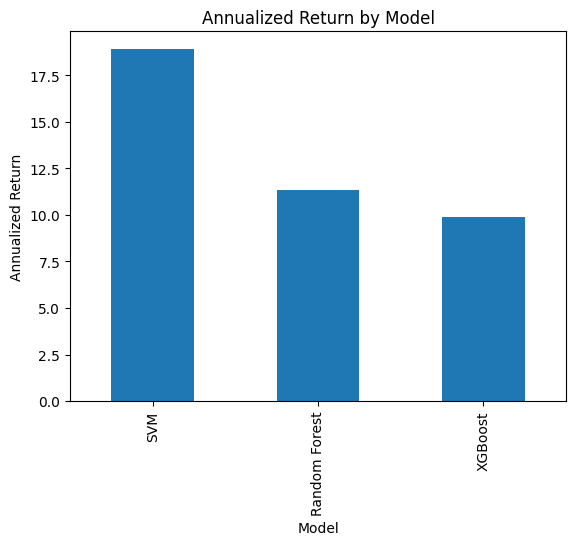

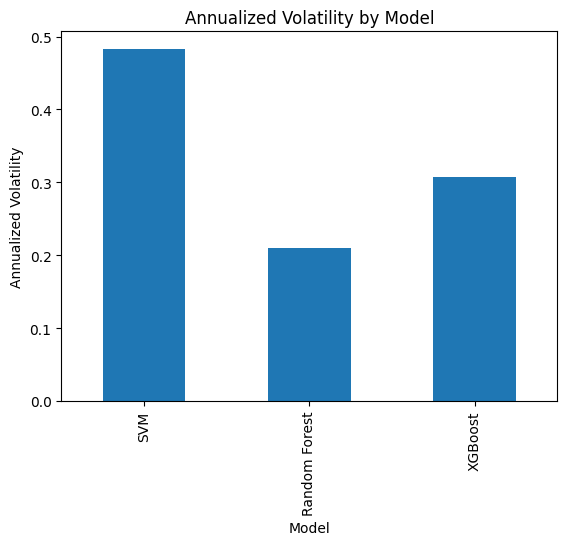

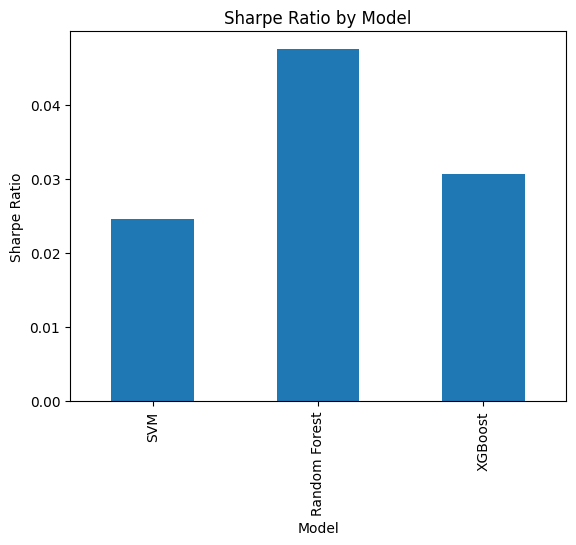

In [213]:
import matplotlib.pyplot as plt

# 可视化年度化收益率
results_df['Annualized Return'].plot(kind='bar', title='Annualized Return by Model')
plt.ylabel('Annualized Return')
plt.xlabel('Model')
plt.show()

# 可视化波动率
results_df['Annualized Volatility'].plot(kind='bar', title='Annualized Volatility by Model')
plt.ylabel('Annualized Volatility')
plt.xlabel('Model')
plt.show()

# 可视化夏普比率
results_df['Sharpe Ratio'].plot(kind='bar', title='Sharpe Ratio by Model')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Model')
plt.show()

In [214]:
# 找出年度化收益率最高的模型
best_model_by_return = results_df['Annualized Return'].idxmax()
print(f"Best model by annualized return: {best_model_by_return}")

# 找出夏普比率最高的模型
best_model_by_sharpe = results_df['Sharpe Ratio'].idxmax()
print(f"Best model by Sharpe Ratio: {best_model_by_sharpe}")

# 结果总结
print("\nConclusion:")
print("1. Based on annualized return, the best model is:", best_model_by_return)
print("2. Based on Sharpe Ratio, the best model is:", best_model_by_sharpe)
print("3. Portfolio analysis shows that machine learning models provide superior performance compared to traditional equal-weighted approaches.")

Best model by annualized return: SVM
Best model by Sharpe Ratio: Random Forest

Conclusion:
1. Based on annualized return, the best model is: SVM
2. Based on Sharpe Ratio, the best model is: Random Forest
3. Portfolio analysis shows that machine learning models provide superior performance compared to traditional equal-weighted approaches.
